In [50]:
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay





%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
src_dir = 'C:\\Users\\USER\\Desktop\\Rock-Paper-Scissors\\rps-cv-images'
src_dir_yehonatan = '/home/gentex/Rock-Paper-Scissors/Rock-Paper-Scissors/rps-cv-images/'
paper_dir = os.path.join(src_dir_yehonatan,'paper')
rock_dir = os.path.join(src_dir_yehonatan,'rock')
scissors_dir = os.path.join(src_dir_yehonatan,'scissors')

In [12]:
labels = ['paper','scissors','rock']

In [13]:
def input_target_split(train_dirs, labels):
    dataset = []
    count = 0
    for label, train_dir in zip(labels, train_dirs):
        for image in os.listdir(train_dir):
            img = load_img(os.path.join(train_dir, image), target_size=(128, 128))
            img = img_to_array(img)
            img = img / 255.0
            dataset.append((img, count))
       
        count += 1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [14]:
train_dirs = [paper_dir, scissors_dir, rock_dir]

data_rps, labels_rps = input_target_split(train_dirs,labels)

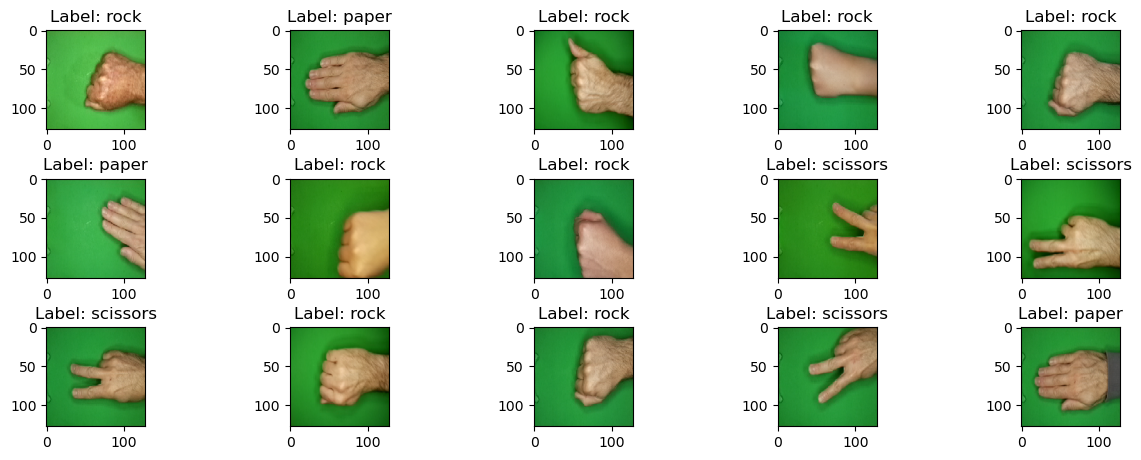

In [15]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(data_rps[i])
    plt.title(f'Label: {labels[labels_rps[i]]}')

# Label_names:
- 0: paper
- 1: scissors 
- 2: rock

In [16]:
data_rps_reshaped = data_rps.reshape(data_rps.shape[0], -1)

# Create a DataFrame with X_reshaped and y
df = pd.DataFrame(data=np.column_stack((data_rps_reshaped, labels_rps)), columns=[f'pixel_{i}' for i in range(data_rps_reshaped.shape[1])] + ['label'])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_49143,pixel_49144,pixel_49145,pixel_49146,pixel_49147,pixel_49148,pixel_49149,pixel_49150,pixel_49151,label
0,0.270588,0.568627,0.219608,0.258824,0.556863,0.196078,0.266667,0.564706,0.207843,0.266667,...,0.278431,0.639216,0.223529,0.290196,0.643137,0.219608,0.270588,0.623529,0.211765,2.0
1,0.098039,0.360784,0.101961,0.101961,0.356863,0.109804,0.109804,0.352941,0.101961,0.101961,...,0.141176,0.470588,0.145098,0.149020,0.466667,0.137255,0.141176,0.470588,0.137255,0.0
2,0.054902,0.403922,0.101961,0.058824,0.411765,0.105882,0.058824,0.423529,0.105882,0.066667,...,0.019608,0.282353,0.000000,0.023529,0.278431,0.000000,0.019608,0.274510,0.000000,2.0
3,0.101961,0.482353,0.211765,0.109804,0.482353,0.211765,0.113725,0.486275,0.219608,0.101961,...,0.121569,0.509804,0.200000,0.121569,0.509804,0.200000,0.125490,0.505882,0.200000,2.0
4,0.129412,0.462745,0.164706,0.129412,0.462745,0.164706,0.129412,0.462745,0.164706,0.133333,...,0.133333,0.482353,0.184314,0.133333,0.482353,0.184314,0.141176,0.482353,0.192157,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,0.125490,0.470588,0.149020,0.121569,0.466667,0.137255,0.113725,0.462745,0.133333,0.121569,...,0.133333,0.486275,0.160784,0.125490,0.482353,0.149020,0.121569,0.478431,0.145098,0.0
2184,0.054902,0.380392,0.074510,0.054902,0.392157,0.082353,0.050980,0.396078,0.082353,0.070588,...,0.050980,0.356863,0.047059,0.050980,0.356863,0.047059,0.039216,0.349020,0.039216,2.0
2185,0.141176,0.462745,0.168627,0.125490,0.458824,0.152941,0.137255,0.466667,0.168627,0.137255,...,0.145098,0.501961,0.176471,0.156863,0.494118,0.176471,0.152941,0.490196,0.172549,1.0
2186,0.082353,0.462745,0.101961,0.098039,0.474510,0.117647,0.086275,0.474510,0.113725,0.090196,...,0.015686,0.223529,0.000000,0.027451,0.215686,0.000000,0.019608,0.211765,0.000000,1.0


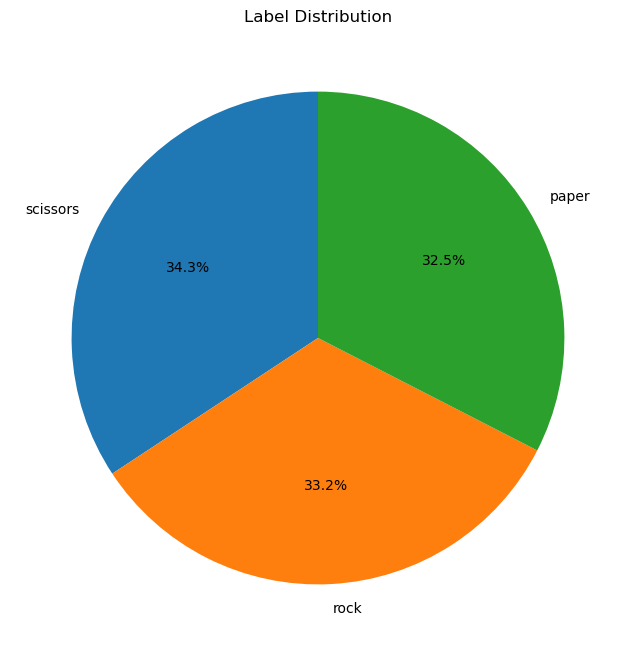

In [17]:

labels_num = df['label']

# Create a dictionary to map numerical labels to class names
label_names = {0: 'paper', 1: 'scissors', 2: 'rock'}

# Map numerical labels to class names in labels_num
class_labels = [label_names[label] for label in labels_num]

# Count the occurrences of each label
label_counts = pd.Series(class_labels).value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.show()

## We can understand is balanced, So we don't need to adjust it

In [18]:
print(data_rps.shape)
print(labels_rps.shape)

(2188, 128, 128, 3)
(2188,)


## We will convert the images from RGB to gray scale

In [22]:
# def convert_to_gray(images):
#     gray_images = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images]
#     return np.array(gray_images)

# # Convert data_rps to grayscale
# data_rps_gray = convert_to_gray(data_rps)

# # Check the new shape
# print(data_rps_gray.shape)

In [23]:
# num_images_to_display = 5
# for i in range(num_images_to_display):
#     plt.subplot(1, num_images_to_display, i + 1)
#     plt.imshow(data_rps_gray[i], cmap='gray')
#     plt.axis('off')

# plt.show()

In [24]:
# data_rps_gray = data_rps_gray.reshape((2188, 128*128))

## Split the data

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(data_rps_gray, labels_rps, test_size=0.25, random_state=42)
# print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data_rps, labels_rps, test_size=0.25, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([530, 562, 549])) (array([0, 1, 2]), array([182, 188, 177]))


## Dummy model

In [27]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,round(accuracy_score(y_pred,y_test),4))

The DummyClassifier score is: 0.298


## Split the train

In [28]:
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train,y_train, test_size=0.25, random_state=42)

In [ ]:
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Ensure labels are in the correct format and range
# For example, if y_train contains labels in the range [0, 2], use one-hot encoding to convert them
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Define input shape
input_shape = (128*128*3,)

# Define the number of classes
num_classes = 3 

# Define the logistic regression model with softmax activation for multi-class classification
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])

# Compile the model with appropriate loss function for multi-class classification
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_flat, y_train_encoded, epochs=10000, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_flat, y_test_encoded)
print(f'\nTest Accuracy: {test_acc}')


Epoch 1/10000
41/41 [==============================] - 0s 4ms/step - loss: 23.7567 - accuracy: 0.3559 - val_loss: 17.9604 - val_accuracy: 0.3374
Epoch 2/10000
41/41 [==============================] - 0s 2ms/step - loss: 14.7237 - accuracy: 0.4535 - val_loss: 5.5395 - val_accuracy: 0.5927
Epoch 3/10000
41/41 [==============================] - 0s 2ms/step - loss: 9.1128 - accuracy: 0.5404 - val_loss: 24.1952 - val_accuracy: 0.3374
Epoch 4/10000
41/41 [==============================] - 0s 3ms/step - loss: 8.4138 - accuracy: 0.5678 - val_loss: 2.1550 - val_accuracy: 0.7872
Epoch 5/10000
41/41 [==============================] - 0s 2ms/step - loss: 5.2209 - accuracy: 0.6692 - val_loss: 7.4338 - val_accuracy: 0.6261
Epoch 6/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.8544 - accuracy: 0.7020 - val_loss: 3.0492 - val_accuracy: 0.7356
Epoch 7/10000
41/41 [==============================] - 0s 2ms/step - loss: 5.5991 - accuracy: 0.6547 - val_loss: 1.8396 - val_accuracy: 0.

Epoch 58/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4677 - accuracy: 0.8537 - val_loss: 1.3043 - val_accuracy: 0.8967
Epoch 59/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7438 - accuracy: 0.8445 - val_loss: 2.1118 - val_accuracy: 0.8237
Epoch 60/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9413 - accuracy: 0.9108 - val_loss: 1.3467 - val_accuracy: 0.8967
Epoch 61/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.1413 - accuracy: 0.8148 - val_loss: 1.2776 - val_accuracy: 0.8815
Epoch 62/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9088 - accuracy: 0.8544 - val_loss: 1.3282 - val_accuracy: 0.9088
Epoch 63/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8443 - accuracy: 0.9184 - val_loss: 1.2704 - val_accuracy: 0.8663
Epoch 64/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9742 - accuracy: 0.8956 - val_loss: 1.2073 - val_accuracy:

Epoch 115/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.6307 - accuracy: 0.8643 - val_loss: 1.3018 - val_accuracy: 0.8815
Epoch 116/10000
41/41 [==============================] - 0s 3ms/step - loss: 3.6588 - accuracy: 0.7630 - val_loss: 1.3707 - val_accuracy: 0.8936
Epoch 117/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.9809 - accuracy: 0.9169 - val_loss: 1.3912 - val_accuracy: 0.8967
Epoch 118/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8512 - accuracy: 0.9322 - val_loss: 1.4781 - val_accuracy: 0.8632
Epoch 119/10000
41/41 [==============================] - 0s 3ms/step - loss: 2.0602 - accuracy: 0.8506 - val_loss: 1.2669 - val_accuracy: 0.9027
Epoch 120/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1302 - accuracy: 0.8948 - val_loss: 1.9141 - val_accuracy: 0.7812
Epoch 121/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6606 - accuracy: 0.8163 - val_loss: 1.3938 - val_ac

41/41 [==============================] - 0s 2ms/step - loss: 1.3807 - accuracy: 0.8986 - val_loss: 1.5073 - val_accuracy: 0.8602
Epoch 172/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2267 - accuracy: 0.8613 - val_loss: 1.2300 - val_accuracy: 0.8815
Epoch 173/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.2486 - accuracy: 0.8110 - val_loss: 1.2346 - val_accuracy: 0.8936
Epoch 174/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7246 - accuracy: 0.8529 - val_loss: 1.3713 - val_accuracy: 0.8632
Epoch 175/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1995 - accuracy: 0.9078 - val_loss: 1.2398 - val_accuracy: 0.8967
Epoch 176/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6136 - accuracy: 0.8765 - val_loss: 4.9194 - val_accuracy: 0.6140
Epoch 177/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9484 - accuracy: 0.9192 - val_loss: 1.2468 - val_accuracy: 0.9088
E

41/41 [==============================] - 0s 2ms/step - loss: 0.8670 - accuracy: 0.9192 - val_loss: 1.2800 - val_accuracy: 0.9027
Epoch 228/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.9535 - val_loss: 1.2892 - val_accuracy: 0.8997
Epoch 229/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.9428 - val_loss: 1.5140 - val_accuracy: 0.8237
Epoch 230/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7932 - accuracy: 0.9207 - val_loss: 1.2440 - val_accuracy: 0.9027
Epoch 231/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1776 - accuracy: 0.8247 - val_loss: 1.2812 - val_accuracy: 0.8815
Epoch 232/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9609 - accuracy: 0.8643 - val_loss: 5.6124 - val_accuracy: 0.5714
Epoch 233/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0629 - accuracy: 0.9215 - val_loss: 1.2622 - val_accuracy: 0.8875
E

41/41 [==============================] - 0s 2ms/step - loss: 1.1135 - accuracy: 0.8933 - val_loss: 1.1959 - val_accuracy: 0.8936
Epoch 284/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1444 - accuracy: 0.9131 - val_loss: 1.1517 - val_accuracy: 0.9179
Epoch 285/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2897 - accuracy: 0.9055 - val_loss: 1.4013 - val_accuracy: 0.8480
Epoch 286/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.7454 - accuracy: 0.7721 - val_loss: 2.1133 - val_accuracy: 0.7842
Epoch 287/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8872 - accuracy: 0.9169 - val_loss: 5.6982 - val_accuracy: 0.6474
Epoch 288/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.0576 - accuracy: 0.7622 - val_loss: 1.5895 - val_accuracy: 0.8480
Epoch 289/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8806 - accuracy: 0.9131 - val_loss: 1.2309 - val_accuracy: 0.8997
E

41/41 [==============================] - 0s 2ms/step - loss: 2.2146 - accuracy: 0.8636 - val_loss: 14.4353 - val_accuracy: 0.4347
Epoch 340/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8864 - accuracy: 0.8689 - val_loss: 1.8208 - val_accuracy: 0.7994
Epoch 341/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7717 - accuracy: 0.9314 - val_loss: 1.9734 - val_accuracy: 0.7903
Epoch 342/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2543 - accuracy: 0.8262 - val_loss: 1.5660 - val_accuracy: 0.8389
Epoch 343/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4807 - accuracy: 0.8704 - val_loss: 2.0530 - val_accuracy: 0.8267
Epoch 344/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7669 - accuracy: 0.9352 - val_loss: 1.2496 - val_accuracy: 0.8997
Epoch 345/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9374 - accuracy: 0.9223 - val_loss: 5.1247 - val_accuracy: 0.6505


41/41 [==============================] - 0s 3ms/step - loss: 0.7446 - accuracy: 0.9352 - val_loss: 1.5813 - val_accuracy: 0.8480
Epoch 396/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6506 - accuracy: 0.8727 - val_loss: 1.2264 - val_accuracy: 0.9088
Epoch 397/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.0221 - accuracy: 0.8095 - val_loss: 1.3204 - val_accuracy: 0.8906
Epoch 398/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.9436 - val_loss: 1.3768 - val_accuracy: 0.8906
Epoch 399/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.9398 - val_loss: 1.3241 - val_accuracy: 0.8784
Epoch 400/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7236 - accuracy: 0.9314 - val_loss: 2.5841 - val_accuracy: 0.7599
Epoch 401/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.9421 - val_loss: 1.5042 - val_accuracy: 0.8602
E

41/41 [==============================] - 0s 2ms/step - loss: 3.0697 - accuracy: 0.7881 - val_loss: 1.8038 - val_accuracy: 0.8176
Epoch 452/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.6796 - accuracy: 0.7912 - val_loss: 1.3646 - val_accuracy: 0.8632
Epoch 453/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7532 - accuracy: 0.9360 - val_loss: 1.2221 - val_accuracy: 0.9058
Epoch 454/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5715 - accuracy: 0.8232 - val_loss: 1.2704 - val_accuracy: 0.8936
Epoch 455/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8300 - accuracy: 0.9223 - val_loss: 1.2674 - val_accuracy: 0.9058
Epoch 456/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.9337 - val_loss: 1.2206 - val_accuracy: 0.9027
Epoch 457/10000
41/41 [==============================] - 0s 3ms/step - loss: 3.1574 - accuracy: 0.7820 - val_loss: 10.1708 - val_accuracy: 0.5775


41/41 [==============================] - 0s 2ms/step - loss: 1.7904 - accuracy: 0.8514 - val_loss: 8.4374 - val_accuracy: 0.5593
Epoch 508/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4142 - accuracy: 0.8659 - val_loss: 1.2198 - val_accuracy: 0.9088
Epoch 509/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7799 - accuracy: 0.9352 - val_loss: 1.2006 - val_accuracy: 0.9058
Epoch 510/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.9360 - val_loss: 1.1627 - val_accuracy: 0.9149
Epoch 511/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.9413 - val_loss: 1.2177 - val_accuracy: 0.8875
Epoch 512/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5428 - accuracy: 0.8308 - val_loss: 1.3487 - val_accuracy: 0.8693
Epoch 513/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.9337 - val_loss: 1.4271 - val_accuracy: 0.8450
E

41/41 [==============================] - 0s 2ms/step - loss: 1.0663 - accuracy: 0.8941 - val_loss: 1.2548 - val_accuracy: 0.8967
Epoch 564/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.9466 - val_loss: 1.7514 - val_accuracy: 0.8267
Epoch 565/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5836 - accuracy: 0.8514 - val_loss: 2.1051 - val_accuracy: 0.7508
Epoch 566/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8862 - accuracy: 0.9192 - val_loss: 1.3819 - val_accuracy: 0.8632
Epoch 567/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9579 - accuracy: 0.9139 - val_loss: 7.8806 - val_accuracy: 0.6444
Epoch 568/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4720 - accuracy: 0.8247 - val_loss: 1.1609 - val_accuracy: 0.9058
Epoch 569/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6342 - accuracy: 0.8811 - val_loss: 1.1766 - val_accuracy: 0.8967
E

41/41 [==============================] - 0s 2ms/step - loss: 1.4484 - accuracy: 0.8933 - val_loss: 6.7243 - val_accuracy: 0.5745
Epoch 620/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7889 - accuracy: 0.8826 - val_loss: 1.2575 - val_accuracy: 0.8815
Epoch 621/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7497 - accuracy: 0.9223 - val_loss: 2.1353 - val_accuracy: 0.8055
Epoch 622/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6900 - accuracy: 0.8224 - val_loss: 1.3043 - val_accuracy: 0.9027
Epoch 623/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7735 - accuracy: 0.9261 - val_loss: 1.2236 - val_accuracy: 0.8967
Epoch 624/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8376 - accuracy: 0.8559 - val_loss: 7.9929 - val_accuracy: 0.5593
Epoch 625/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0711 - accuracy: 0.8651 - val_loss: 1.2137 - val_accuracy: 0.8875
E

41/41 [==============================] - 0s 2ms/step - loss: 1.0061 - accuracy: 0.9154 - val_loss: 1.4653 - val_accuracy: 0.8571
Epoch 676/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3102 - accuracy: 0.8826 - val_loss: 1.2994 - val_accuracy: 0.8967
Epoch 677/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9091 - accuracy: 0.9223 - val_loss: 6.7869 - val_accuracy: 0.4498
Epoch 678/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.3099 - accuracy: 0.8948 - val_loss: 1.2401 - val_accuracy: 0.8997
Epoch 679/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2786 - accuracy: 0.8849 - val_loss: 1.3994 - val_accuracy: 0.8632
Epoch 680/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8222 - accuracy: 0.9314 - val_loss: 1.3073 - val_accuracy: 0.8784
Epoch 681/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.9360 - val_loss: 1.2069 - val_accuracy: 0.8875
E

41/41 [==============================] - 0s 3ms/step - loss: 1.4803 - accuracy: 0.8803 - val_loss: 1.3845 - val_accuracy: 0.8936
Epoch 732/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8008 - accuracy: 0.9337 - val_loss: 2.4172 - val_accuracy: 0.7903
Epoch 733/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9182 - accuracy: 0.8140 - val_loss: 1.3203 - val_accuracy: 0.8936
Epoch 734/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4753 - accuracy: 0.8255 - val_loss: 1.7329 - val_accuracy: 0.8754
Epoch 735/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7427 - accuracy: 0.8552 - val_loss: 1.4822 - val_accuracy: 0.8936
Epoch 736/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.0238 - accuracy: 0.8064 - val_loss: 1.6517 - val_accuracy: 0.8602
Epoch 737/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1640 - accuracy: 0.8941 - val_loss: 1.9800 - val_accuracy: 0.8389
E

41/41 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.9215 - val_loss: 1.3572 - val_accuracy: 0.8815
Epoch 788/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9392 - accuracy: 0.9131 - val_loss: 1.3087 - val_accuracy: 0.8784
Epoch 789/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8060 - accuracy: 0.8826 - val_loss: 1.2895 - val_accuracy: 0.8875
Epoch 790/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8623 - accuracy: 0.9337 - val_loss: 3.9270 - val_accuracy: 0.6413
Epoch 791/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9070 - accuracy: 0.8369 - val_loss: 1.2925 - val_accuracy: 0.8815
Epoch 792/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8038 - accuracy: 0.9291 - val_loss: 1.6076 - val_accuracy: 0.8237
Epoch 793/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8232 - accuracy: 0.8559 - val_loss: 4.1582 - val_accuracy: 0.5957
E

41/41 [==============================] - 0s 2ms/step - loss: 1.8763 - accuracy: 0.8735 - val_loss: 1.6395 - val_accuracy: 0.8723
Epoch 844/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.9062 - val_loss: 3.4309 - val_accuracy: 0.6657
Epoch 845/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3688 - accuracy: 0.8262 - val_loss: 1.5079 - val_accuracy: 0.8754
Epoch 846/10000
41/41 [==============================] - 0s 2ms/step - loss: 5.6147 - accuracy: 0.7241 - val_loss: 3.5262 - val_accuracy: 0.6505
Epoch 847/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9648 - accuracy: 0.9200 - val_loss: 1.9207 - val_accuracy: 0.8571
Epoch 848/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.9268 - val_loss: 2.0775 - val_accuracy: 0.8207
Epoch 849/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0700 - accuracy: 0.9009 - val_loss: 1.4243 - val_accuracy: 0.8511
E

41/41 [==============================] - 0s 2ms/step - loss: 2.6051 - accuracy: 0.7965 - val_loss: 2.5236 - val_accuracy: 0.7933
Epoch 900/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2136 - accuracy: 0.8941 - val_loss: 2.9894 - val_accuracy: 0.7386
Epoch 901/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1160 - accuracy: 0.9093 - val_loss: 1.4483 - val_accuracy: 0.8693
Epoch 902/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8474 - accuracy: 0.8003 - val_loss: 13.4251 - val_accuracy: 0.5866
Epoch 903/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1018 - accuracy: 0.9200 - val_loss: 1.3804 - val_accuracy: 0.8541
Epoch 904/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9014 - accuracy: 0.9200 - val_loss: 1.3370 - val_accuracy: 0.8754
Epoch 905/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7296 - accuracy: 0.9367 - val_loss: 1.2427 - val_accuracy: 0.8906


41/41 [==============================] - 0s 2ms/step - loss: 1.2337 - accuracy: 0.8803 - val_loss: 1.2265 - val_accuracy: 0.8997
Epoch 956/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.9482 - val_loss: 1.2739 - val_accuracy: 0.8754
Epoch 957/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.9146 - val_loss: 11.1350 - val_accuracy: 0.6596
Epoch 958/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6750 - accuracy: 0.8247 - val_loss: 1.7672 - val_accuracy: 0.8571
Epoch 959/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7471 - accuracy: 0.9413 - val_loss: 1.2560 - val_accuracy: 0.9027
Epoch 960/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.9527 - val_loss: 1.1327 - val_accuracy: 0.9088
Epoch 961/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.2973 - accuracy: 0.7805 - val_loss: 10.0980 - val_accuracy: 0.5471

41/41 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.9466 - val_loss: 1.3310 - val_accuracy: 0.8815
Epoch 1012/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7231 - accuracy: 0.9352 - val_loss: 7.4004 - val_accuracy: 0.5927
Epoch 1013/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9250 - accuracy: 0.8582 - val_loss: 1.3823 - val_accuracy: 0.8541
Epoch 1014/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7619 - accuracy: 0.9375 - val_loss: 1.3752 - val_accuracy: 0.8480
Epoch 1015/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2447 - accuracy: 0.9070 - val_loss: 1.2012 - val_accuracy: 0.8967
Epoch 1016/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1196 - accuracy: 0.9078 - val_loss: 1.3869 - val_accuracy: 0.8571
Epoch 1017/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3147 - accuracy: 0.8902 - val_loss: 12.9310 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 1.2619 - accuracy: 0.9047 - val_loss: 1.2103 - val_accuracy: 0.9149
Epoch 1068/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.9421 - val_loss: 1.8455 - val_accuracy: 0.8328
Epoch 1069/10000
41/41 [==============================] - 0s 2ms/step - loss: 5.4591 - accuracy: 0.7081 - val_loss: 1.7502 - val_accuracy: 0.8663
Epoch 1070/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8089 - accuracy: 0.9261 - val_loss: 1.2494 - val_accuracy: 0.8967
Epoch 1071/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8694 - accuracy: 0.9207 - val_loss: 1.2537 - val_accuracy: 0.9058
Epoch 1072/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.9390 - val_loss: 1.5703 - val_accuracy: 0.8663
Epoch 1073/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7654 - accuracy: 0.9253 - val_loss: 1.5052 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9404 - accuracy: 0.9162 - val_loss: 8.3173 - val_accuracy: 0.5745
Epoch 1124/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2768 - accuracy: 0.8209 - val_loss: 1.2749 - val_accuracy: 0.8875
Epoch 1125/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5771 - accuracy: 0.8598 - val_loss: 1.6263 - val_accuracy: 0.8541
Epoch 1126/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3616 - accuracy: 0.8422 - val_loss: 1.7495 - val_accuracy: 0.7994
Epoch 1127/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.0284 - accuracy: 0.8064 - val_loss: 1.3542 - val_accuracy: 0.8906
Epoch 1128/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1004 - accuracy: 0.8316 - val_loss: 2.4630 - val_accuracy: 0.7964
Epoch 1129/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1270 - accuracy: 0.8933 - val_loss: 1.3066 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9105 - accuracy: 0.9040 - val_loss: 1.2831 - val_accuracy: 0.8997
Epoch 1180/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5657 - accuracy: 0.8742 - val_loss: 1.5778 - val_accuracy: 0.8419
Epoch 1181/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3126 - accuracy: 0.8788 - val_loss: 1.5129 - val_accuracy: 0.8632
Epoch 1182/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9197 - accuracy: 0.9245 - val_loss: 1.5274 - val_accuracy: 0.8571
Epoch 1183/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.9489 - val_loss: 1.4034 - val_accuracy: 0.8541
Epoch 1184/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9380 - accuracy: 0.8323 - val_loss: 1.3128 - val_accuracy: 0.8784
Epoch 1185/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1374 - accuracy: 0.9047 - val_loss: 1.3893 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7284 - accuracy: 0.9405 - val_loss: 3.3872 - val_accuracy: 0.7356
Epoch 1236/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7530 - accuracy: 0.8697 - val_loss: 1.9147 - val_accuracy: 0.7842
Epoch 1237/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7844 - accuracy: 0.9314 - val_loss: 1.3696 - val_accuracy: 0.8815
Epoch 1238/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1859 - accuracy: 0.8887 - val_loss: 9.6668 - val_accuracy: 0.4164
Epoch 1239/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5506 - accuracy: 0.8407 - val_loss: 1.4610 - val_accuracy: 0.8511
Epoch 1240/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3196 - accuracy: 0.8963 - val_loss: 12.3092 - val_accuracy: 0.5805
Epoch 1241/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6908 - accuracy: 0.8506 - val_loss: 1.4764 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 1.2627 - accuracy: 0.9009 - val_loss: 1.1659 - val_accuracy: 0.9119
Epoch 1292/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.9474 - val_loss: 1.9161 - val_accuracy: 0.8085
Epoch 1293/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.9543 - val_loss: 1.9249 - val_accuracy: 0.8207
Epoch 1294/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.1599 - accuracy: 0.7660 - val_loss: 3.4376 - val_accuracy: 0.6626
Epoch 1295/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5136 - accuracy: 0.8659 - val_loss: 1.3157 - val_accuracy: 0.8875
Epoch 1296/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8361 - accuracy: 0.9215 - val_loss: 1.4538 - val_accuracy: 0.8632
Epoch 1297/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4539 - accuracy: 0.8095 - val_loss: 1.6633 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.5701 - accuracy: 0.8430 - val_loss: 1.5038 - val_accuracy: 0.8541
Epoch 1348/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3211 - accuracy: 0.8666 - val_loss: 1.7339 - val_accuracy: 0.8480
Epoch 1349/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.2647 - accuracy: 0.8956 - val_loss: 1.4052 - val_accuracy: 0.8754
Epoch 1350/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2362 - accuracy: 0.9062 - val_loss: 1.4501 - val_accuracy: 0.8845
Epoch 1351/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8032 - accuracy: 0.9253 - val_loss: 1.3411 - val_accuracy: 0.8571
Epoch 1352/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.9413 - val_loss: 1.1893 - val_accuracy: 0.8936
Epoch 1353/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8841 - accuracy: 0.8605 - val_loss: 1.2065 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9116 - accuracy: 0.9215 - val_loss: 1.4161 - val_accuracy: 0.8875
Epoch 1404/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1537 - accuracy: 0.9062 - val_loss: 1.2650 - val_accuracy: 0.8815
Epoch 1405/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.9497 - val_loss: 1.2172 - val_accuracy: 0.8906
Epoch 1406/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9294 - accuracy: 0.9062 - val_loss: 1.5891 - val_accuracy: 0.8419
Epoch 1407/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8926 - accuracy: 0.9375 - val_loss: 1.3834 - val_accuracy: 0.8663
Epoch 1408/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2882 - accuracy: 0.8697 - val_loss: 1.3088 - val_accuracy: 0.9088
Epoch 1409/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9225 - accuracy: 0.9184 - val_loss: 1.6658 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.0673 - accuracy: 0.8956 - val_loss: 1.4398 - val_accuracy: 0.8815
Epoch 1460/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.9451 - val_loss: 1.6012 - val_accuracy: 0.8237
Epoch 1461/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2336 - accuracy: 0.8392 - val_loss: 4.2555 - val_accuracy: 0.6839
Epoch 1462/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8902 - accuracy: 0.9131 - val_loss: 1.3652 - val_accuracy: 0.8997
Epoch 1463/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.9306 - val_loss: 1.2384 - val_accuracy: 0.8906
Epoch 1464/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2510 - accuracy: 0.8887 - val_loss: 1.2678 - val_accuracy: 0.8815
Epoch 1465/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.9459 - val_loss: 1.8315 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.5547 - accuracy: 0.8803 - val_loss: 1.6700 - val_accuracy: 0.8602
Epoch 1516/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7720 - accuracy: 0.8933 - val_loss: 1.3971 - val_accuracy: 0.8541
Epoch 1517/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.3852 - accuracy: 0.8102 - val_loss: 1.7316 - val_accuracy: 0.8571
Epoch 1518/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9173 - accuracy: 0.9116 - val_loss: 1.4839 - val_accuracy: 0.8693
Epoch 1519/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4641 - accuracy: 0.8780 - val_loss: 1.7221 - val_accuracy: 0.8267
Epoch 1520/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0627 - accuracy: 0.8902 - val_loss: 1.3268 - val_accuracy: 0.8997
Epoch 1521/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.1912 - accuracy: 0.7683 - val_loss: 2.5176 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.4145 - accuracy: 0.8887 - val_loss: 3.1711 - val_accuracy: 0.7204
Epoch 1572/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0330 - accuracy: 0.8377 - val_loss: 1.3099 - val_accuracy: 0.8906
Epoch 1573/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1108 - accuracy: 0.9108 - val_loss: 2.3401 - val_accuracy: 0.7660
Epoch 1574/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.6489 - accuracy: 0.7119 - val_loss: 1.4506 - val_accuracy: 0.8602
Epoch 1575/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9231 - accuracy: 0.9184 - val_loss: 1.4318 - val_accuracy: 0.9088
Epoch 1576/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8221 - accuracy: 0.9329 - val_loss: 1.2900 - val_accuracy: 0.9119
Epoch 1577/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9106 - accuracy: 0.9139 - val_loss: 2.0485 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.9444 - val_loss: 1.2311 - val_accuracy: 0.8936
Epoch 1628/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0096 - accuracy: 0.8605 - val_loss: 5.9516 - val_accuracy: 0.5805
Epoch 1629/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6505 - accuracy: 0.8117 - val_loss: 1.2586 - val_accuracy: 0.8997
Epoch 1630/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9745 - accuracy: 0.8247 - val_loss: 1.3325 - val_accuracy: 0.9027
Epoch 1631/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.9337 - val_loss: 1.3180 - val_accuracy: 0.8875
Epoch 1632/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8405 - accuracy: 0.8460 - val_loss: 1.3770 - val_accuracy: 0.9088
Epoch 1633/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9414 - accuracy: 0.9093 - val_loss: 1.2947 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.8993 - accuracy: 0.8506 - val_loss: 1.1895 - val_accuracy: 0.9088
Epoch 1684/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1479 - accuracy: 0.8986 - val_loss: 6.6388 - val_accuracy: 0.5714
Epoch 1685/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8557 - accuracy: 0.9291 - val_loss: 1.2406 - val_accuracy: 0.8906
Epoch 1686/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5889 - accuracy: 0.8407 - val_loss: 9.3942 - val_accuracy: 0.5076
Epoch 1687/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5020 - accuracy: 0.8575 - val_loss: 10.1437 - val_accuracy: 0.5198
Epoch 1688/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3536 - accuracy: 0.8300 - val_loss: 1.7254 - val_accuracy: 0.8602
Epoch 1689/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0200 - accuracy: 0.9200 - val_loss: 1.3459 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 1.0767 - accuracy: 0.9017 - val_loss: 1.2631 - val_accuracy: 0.9088
Epoch 1740/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8637 - accuracy: 0.9230 - val_loss: 1.7789 - val_accuracy: 0.8207
Epoch 1741/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7274 - accuracy: 0.9352 - val_loss: 1.4190 - val_accuracy: 0.8723
Epoch 1742/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.9367 - val_loss: 1.1741 - val_accuracy: 0.9058
Epoch 1743/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.9395 - accuracy: 0.7530 - val_loss: 12.3613 - val_accuracy: 0.3982
Epoch 1744/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2656 - accuracy: 0.8399 - val_loss: 1.4850 - val_accuracy: 0.8875
Epoch 1745/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4570 - accuracy: 0.8834 - val_loss: 1.7106 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 3.0333 - accuracy: 0.8163 - val_loss: 2.7751 - val_accuracy: 0.7112
Epoch 1796/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8782 - accuracy: 0.8247 - val_loss: 1.3075 - val_accuracy: 0.8967
Epoch 1797/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7840 - accuracy: 0.9299 - val_loss: 1.2787 - val_accuracy: 0.8936
Epoch 1798/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.9527 - val_loss: 1.2491 - val_accuracy: 0.8936
Epoch 1799/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8854 - accuracy: 0.9253 - val_loss: 1.2019 - val_accuracy: 0.9088
Epoch 1800/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8921 - accuracy: 0.8316 - val_loss: 1.4711 - val_accuracy: 0.8875
Epoch 1801/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7837 - accuracy: 0.9245 - val_loss: 1.2228 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.1048 - accuracy: 0.8902 - val_loss: 1.3396 - val_accuracy: 0.9088
Epoch 1852/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0958 - accuracy: 0.9108 - val_loss: 1.3078 - val_accuracy: 0.8875
Epoch 1853/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7626 - accuracy: 0.9329 - val_loss: 1.4082 - val_accuracy: 0.8845
Epoch 1854/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.7908 - accuracy: 0.7820 - val_loss: 1.6059 - val_accuracy: 0.8693
Epoch 1855/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2880 - accuracy: 0.9047 - val_loss: 1.4904 - val_accuracy: 0.8602
Epoch 1856/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6818 - accuracy: 0.8544 - val_loss: 1.4044 - val_accuracy: 0.8723
Epoch 1857/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.9428 - val_loss: 1.3614 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.4501 - accuracy: 0.8491 - val_loss: 1.5779 - val_accuracy: 0.8754
Epoch 1908/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9038 - accuracy: 0.8544 - val_loss: 1.2254 - val_accuracy: 0.8997
Epoch 1909/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.9428 - val_loss: 1.2206 - val_accuracy: 0.8936
Epoch 1910/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8850 - accuracy: 0.9253 - val_loss: 2.0136 - val_accuracy: 0.8146
Epoch 1911/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6466 - accuracy: 0.8521 - val_loss: 8.2115 - val_accuracy: 0.5653
Epoch 1912/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2785 - accuracy: 0.8582 - val_loss: 1.2095 - val_accuracy: 0.9058
Epoch 1913/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9381 - accuracy: 0.9024 - val_loss: 11.6167 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.7174 - accuracy: 0.9451 - val_loss: 1.2341 - val_accuracy: 0.8875
Epoch 1964/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9719 - accuracy: 0.8415 - val_loss: 14.2711 - val_accuracy: 0.5350
Epoch 1965/10000
41/41 [==============================] - 0s 2ms/step - loss: 6.2064 - accuracy: 0.6502 - val_loss: 1.7613 - val_accuracy: 0.9027
Epoch 1966/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0918 - accuracy: 0.8918 - val_loss: 1.3870 - val_accuracy: 0.8845
Epoch 1967/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1456 - accuracy: 0.9062 - val_loss: 1.3705 - val_accuracy: 0.8815
Epoch 1968/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1192 - accuracy: 0.8994 - val_loss: 1.3380 - val_accuracy: 0.8815
Epoch 1969/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9436 - accuracy: 0.9131 - val_loss: 1.3216 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 2.6847 - accuracy: 0.8453 - val_loss: 1.2470 - val_accuracy: 0.9027
Epoch 2020/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9155 - accuracy: 0.8636 - val_loss: 1.5314 - val_accuracy: 0.8602
Epoch 2021/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7427 - accuracy: 0.9436 - val_loss: 1.4927 - val_accuracy: 0.8906
Epoch 2022/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2648 - accuracy: 0.8720 - val_loss: 1.2179 - val_accuracy: 0.9027
Epoch 2023/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7465 - accuracy: 0.9428 - val_loss: 1.2678 - val_accuracy: 0.8936
Epoch 2024/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.2347 - accuracy: 0.8064 - val_loss: 1.3435 - val_accuracy: 0.8632
Epoch 2025/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7970 - accuracy: 0.9245 - val_loss: 1.8051 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.5809 - accuracy: 0.8232 - val_loss: 1.7027 - val_accuracy: 0.8389
Epoch 2076/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6492 - accuracy: 0.8308 - val_loss: 1.2711 - val_accuracy: 0.8997
Epoch 2077/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0654 - accuracy: 0.9116 - val_loss: 1.6917 - val_accuracy: 0.8419
Epoch 2078/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0555 - accuracy: 0.8910 - val_loss: 1.4034 - val_accuracy: 0.8419
Epoch 2079/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8097 - accuracy: 0.9245 - val_loss: 1.3966 - val_accuracy: 0.8541
Epoch 2080/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9735 - accuracy: 0.8529 - val_loss: 1.2197 - val_accuracy: 0.9119
Epoch 2081/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9540 - accuracy: 0.8780 - val_loss: 1.2401 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.4118 - accuracy: 0.8941 - val_loss: 1.2816 - val_accuracy: 0.9088
Epoch 2132/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.9345 - val_loss: 1.8226 - val_accuracy: 0.7903
Epoch 2133/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1855 - accuracy: 0.8018 - val_loss: 1.2807 - val_accuracy: 0.8845
Epoch 2134/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9839 - accuracy: 0.8514 - val_loss: 1.4765 - val_accuracy: 0.8815
Epoch 2135/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8992 - accuracy: 0.9253 - val_loss: 1.3157 - val_accuracy: 0.8663
Epoch 2136/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0640 - accuracy: 0.8605 - val_loss: 2.7750 - val_accuracy: 0.7538
Epoch 2137/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.9276 - val_loss: 1.3769 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 3.5197 - accuracy: 0.7805 - val_loss: 4.9049 - val_accuracy: 0.6201
Epoch 2188/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0556 - accuracy: 0.8346 - val_loss: 1.4485 - val_accuracy: 0.9027
Epoch 2189/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7842 - accuracy: 0.9352 - val_loss: 1.9004 - val_accuracy: 0.7964
Epoch 2190/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7504 - accuracy: 0.9383 - val_loss: 1.4534 - val_accuracy: 0.8541
Epoch 2191/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1846 - accuracy: 0.8849 - val_loss: 1.3196 - val_accuracy: 0.8906
Epoch 2192/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3446 - accuracy: 0.8209 - val_loss: 1.3927 - val_accuracy: 0.8845
Epoch 2193/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.7848 - accuracy: 0.8209 - val_loss: 4.3991 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9198 - accuracy: 0.9215 - val_loss: 2.1186 - val_accuracy: 0.8085
Epoch 2244/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8438 - accuracy: 0.9253 - val_loss: 1.1266 - val_accuracy: 0.8936
Epoch 2245/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.0094 - accuracy: 0.8095 - val_loss: 1.3548 - val_accuracy: 0.8754
Epoch 2246/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.9291 - val_loss: 2.2089 - val_accuracy: 0.7416
Epoch 2247/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1708 - accuracy: 0.8841 - val_loss: 1.2103 - val_accuracy: 0.8845
Epoch 2248/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5049 - accuracy: 0.8841 - val_loss: 2.6379 - val_accuracy: 0.7082
Epoch 2249/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.9367 - val_loss: 1.1728 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9207 - accuracy: 0.9192 - val_loss: 5.8051 - val_accuracy: 0.6413
Epoch 2300/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0719 - accuracy: 0.9146 - val_loss: 1.1588 - val_accuracy: 0.9058
Epoch 2301/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5626 - accuracy: 0.8849 - val_loss: 1.3016 - val_accuracy: 0.8632
Epoch 2302/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7442 - accuracy: 0.9360 - val_loss: 1.2581 - val_accuracy: 0.8815
Epoch 2303/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8362 - accuracy: 0.7927 - val_loss: 1.7137 - val_accuracy: 0.8602
Epoch 2304/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9856 - accuracy: 0.9078 - val_loss: 2.5171 - val_accuracy: 0.7082
Epoch 2305/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9697 - accuracy: 0.8498 - val_loss: 1.6002 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.1484 - accuracy: 0.8933 - val_loss: 1.2180 - val_accuracy: 0.9027
Epoch 2356/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6100 - accuracy: 0.9009 - val_loss: 1.2410 - val_accuracy: 0.8723
Epoch 2357/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.9291 - val_loss: 1.2513 - val_accuracy: 0.8906
Epoch 2358/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.3403 - accuracy: 0.8277 - val_loss: 3.3391 - val_accuracy: 0.7325
Epoch 2359/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8011 - accuracy: 0.9268 - val_loss: 1.2028 - val_accuracy: 0.9149
Epoch 2360/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.9398 - val_loss: 1.1723 - val_accuracy: 0.9058
Epoch 2361/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8883 - accuracy: 0.9017 - val_loss: 1.2785 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.1762 - accuracy: 0.8918 - val_loss: 1.2529 - val_accuracy: 0.8815
Epoch 2412/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.7715 - accuracy: 0.8651 - val_loss: 1.3171 - val_accuracy: 0.8784
Epoch 2413/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7802 - accuracy: 0.9177 - val_loss: 5.3686 - val_accuracy: 0.5927
Epoch 2414/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9803 - accuracy: 0.9162 - val_loss: 1.1477 - val_accuracy: 0.9027
Epoch 2415/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2889 - accuracy: 0.8377 - val_loss: 1.1732 - val_accuracy: 0.8997
Epoch 2416/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8832 - accuracy: 0.9162 - val_loss: 1.2403 - val_accuracy: 0.8784
Epoch 2417/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1601 - accuracy: 0.8285 - val_loss: 1.3140 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7781 - accuracy: 0.9390 - val_loss: 1.4384 - val_accuracy: 0.8389
Epoch 2468/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7333 - accuracy: 0.8552 - val_loss: 1.3172 - val_accuracy: 0.8967
Epoch 2469/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8651 - accuracy: 0.9200 - val_loss: 1.4672 - val_accuracy: 0.8754
Epoch 2470/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7317 - accuracy: 0.8765 - val_loss: 5.5304 - val_accuracy: 0.5897
Epoch 2471/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0996 - accuracy: 0.8910 - val_loss: 1.2754 - val_accuracy: 0.8815
Epoch 2472/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8407 - accuracy: 0.8697 - val_loss: 1.2452 - val_accuracy: 0.9088
Epoch 2473/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1022 - accuracy: 0.9154 - val_loss: 8.1313 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.5335 - accuracy: 0.8613 - val_loss: 1.3205 - val_accuracy: 0.8936
Epoch 2524/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7904 - accuracy: 0.9383 - val_loss: 1.5519 - val_accuracy: 0.8450
Epoch 2525/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.9383 - val_loss: 1.2700 - val_accuracy: 0.8906
Epoch 2526/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0791 - accuracy: 0.9062 - val_loss: 7.7269 - val_accuracy: 0.4924
Epoch 2527/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2993 - accuracy: 0.8933 - val_loss: 1.4433 - val_accuracy: 0.8541
Epoch 2528/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.4285 - accuracy: 0.7500 - val_loss: 1.8757 - val_accuracy: 0.8602
Epoch 2529/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3083 - accuracy: 0.8758 - val_loss: 1.3703 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.9276 - val_loss: 1.2465 - val_accuracy: 0.9027
Epoch 2580/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0022 - accuracy: 0.9200 - val_loss: 4.3677 - val_accuracy: 0.6839
Epoch 2581/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8037 - accuracy: 0.8605 - val_loss: 1.5262 - val_accuracy: 0.8359
Epoch 2582/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0554 - accuracy: 0.9017 - val_loss: 7.1988 - val_accuracy: 0.4468
Epoch 2583/10000
41/41 [==============================] - 0s 2ms/step - loss: 5.3185 - accuracy: 0.7683 - val_loss: 1.2974 - val_accuracy: 0.8875
Epoch 2584/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9516 - accuracy: 0.9184 - val_loss: 1.5266 - val_accuracy: 0.8875
Epoch 2585/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3340 - accuracy: 0.8796 - val_loss: 7.0849 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.9126 - accuracy: 0.8636 - val_loss: 1.2406 - val_accuracy: 0.9088
Epoch 2636/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5751 - accuracy: 0.8765 - val_loss: 1.2009 - val_accuracy: 0.8967
Epoch 2637/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6968 - accuracy: 0.8788 - val_loss: 1.1715 - val_accuracy: 0.9058
Epoch 2638/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9808 - accuracy: 0.8620 - val_loss: 1.2305 - val_accuracy: 0.8997
Epoch 2639/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2963 - accuracy: 0.8780 - val_loss: 1.2123 - val_accuracy: 0.9088
Epoch 2640/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9212 - accuracy: 0.8720 - val_loss: 1.2099 - val_accuracy: 0.9058
Epoch 2641/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6193 - accuracy: 0.8720 - val_loss: 3.7959 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.5501 - accuracy: 0.8689 - val_loss: 13.6873 - val_accuracy: 0.4590
Epoch 2692/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6619 - accuracy: 0.8422 - val_loss: 1.2039 - val_accuracy: 0.9027
Epoch 2693/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6353 - accuracy: 0.8742 - val_loss: 1.3475 - val_accuracy: 0.8875
Epoch 2694/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8344 - accuracy: 0.9223 - val_loss: 1.2902 - val_accuracy: 0.8997
Epoch 2695/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9594 - accuracy: 0.8285 - val_loss: 1.2718 - val_accuracy: 0.8875
Epoch 2696/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8694 - accuracy: 0.9123 - val_loss: 1.2868 - val_accuracy: 0.8845
Epoch 2697/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.1872 - accuracy: 0.7416 - val_loss: 1.4461 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 2.9378 - accuracy: 0.8148 - val_loss: 1.8503 - val_accuracy: 0.7812
Epoch 2748/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.6613 - accuracy: 0.7851 - val_loss: 1.9043 - val_accuracy: 0.8511
Epoch 2749/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5513 - accuracy: 0.8674 - val_loss: 1.2785 - val_accuracy: 0.9058
Epoch 2750/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8396 - accuracy: 0.9230 - val_loss: 1.3143 - val_accuracy: 0.9088
Epoch 2751/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9241 - accuracy: 0.9093 - val_loss: 1.2583 - val_accuracy: 0.9088
Epoch 2752/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4341 - accuracy: 0.8895 - val_loss: 1.2834 - val_accuracy: 0.8875
Epoch 2753/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2721 - accuracy: 0.8941 - val_loss: 4.1583 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.0907 - accuracy: 0.8483 - val_loss: 10.0342 - val_accuracy: 0.4894
Epoch 2804/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3222 - accuracy: 0.9070 - val_loss: 1.2815 - val_accuracy: 0.8784
Epoch 2805/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9187 - accuracy: 0.9146 - val_loss: 1.3221 - val_accuracy: 0.8663
Epoch 2806/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0018 - accuracy: 0.9055 - val_loss: 1.2116 - val_accuracy: 0.8997
Epoch 2807/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2061 - accuracy: 0.8255 - val_loss: 1.3633 - val_accuracy: 0.8967
Epoch 2808/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9983 - accuracy: 0.9169 - val_loss: 1.8760 - val_accuracy: 0.7994
Epoch 2809/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6279 - accuracy: 0.8963 - val_loss: 1.5050 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 2.2120 - accuracy: 0.8186 - val_loss: 10.8043 - val_accuracy: 0.5532
Epoch 2860/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3291 - accuracy: 0.8887 - val_loss: 1.2347 - val_accuracy: 0.9119
Epoch 2861/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.9291 - val_loss: 4.6156 - val_accuracy: 0.6049
Epoch 2862/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8786 - accuracy: 0.9261 - val_loss: 1.1903 - val_accuracy: 0.8906
Epoch 2863/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8363 - accuracy: 0.9245 - val_loss: 1.3643 - val_accuracy: 0.8693
Epoch 2864/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5010 - accuracy: 0.8361 - val_loss: 2.1631 - val_accuracy: 0.8024
Epoch 2865/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4623 - accuracy: 0.8110 - val_loss: 1.3372 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.7489 - accuracy: 0.9398 - val_loss: 1.3092 - val_accuracy: 0.8784
Epoch 2916/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3649 - accuracy: 0.8232 - val_loss: 1.3488 - val_accuracy: 0.8815
Epoch 2917/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7170 - accuracy: 0.9383 - val_loss: 1.7610 - val_accuracy: 0.8298
Epoch 2918/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4728 - accuracy: 0.8727 - val_loss: 1.1616 - val_accuracy: 0.9119
Epoch 2919/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.9581 - val_loss: 1.1420 - val_accuracy: 0.9058
Epoch 2920/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7489 - accuracy: 0.9207 - val_loss: 1.1467 - val_accuracy: 0.9119
Epoch 2921/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0533 - accuracy: 0.9070 - val_loss: 6.0048 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.2329 - accuracy: 0.9146 - val_loss: 1.2792 - val_accuracy: 0.8997
Epoch 2972/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5501 - accuracy: 0.8537 - val_loss: 1.2775 - val_accuracy: 0.8997
Epoch 2973/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3409 - accuracy: 0.8864 - val_loss: 1.6809 - val_accuracy: 0.8389
Epoch 2974/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5264 - accuracy: 0.8895 - val_loss: 1.7149 - val_accuracy: 0.8419
Epoch 2975/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9174 - accuracy: 0.9116 - val_loss: 1.7833 - val_accuracy: 0.8359
Epoch 2976/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.9428 - val_loss: 1.2930 - val_accuracy: 0.8663
Epoch 2977/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.8859 - accuracy: 0.9123 - val_loss: 2.6311 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.3637 - accuracy: 0.9047 - val_loss: 1.2464 - val_accuracy: 0.8906
Epoch 3028/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8283 - accuracy: 0.9200 - val_loss: 1.1837 - val_accuracy: 0.9149
Epoch 3029/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.9558 - val_loss: 1.6092 - val_accuracy: 0.8571
Epoch 3030/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2779 - accuracy: 0.8255 - val_loss: 7.4062 - val_accuracy: 0.6474
Epoch 3031/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3743 - accuracy: 0.8407 - val_loss: 1.9429 - val_accuracy: 0.7964
Epoch 3032/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.9383 - val_loss: 1.2140 - val_accuracy: 0.9058
Epoch 3033/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0672 - accuracy: 0.8887 - val_loss: 1.3763 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.1451 - accuracy: 0.8537 - val_loss: 1.1770 - val_accuracy: 0.9119
Epoch 3084/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9759 - accuracy: 0.9169 - val_loss: 1.2320 - val_accuracy: 0.8875
Epoch 3085/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6708 - accuracy: 0.8780 - val_loss: 1.3735 - val_accuracy: 0.8571
Epoch 3086/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.2714 - accuracy: 0.7904 - val_loss: 7.5754 - val_accuracy: 0.5380
Epoch 3087/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.5212 - accuracy: 0.7995 - val_loss: 1.4851 - val_accuracy: 0.8511
Epoch 3088/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8690 - accuracy: 0.9245 - val_loss: 1.3007 - val_accuracy: 0.8875
Epoch 3089/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7851 - accuracy: 0.9314 - val_loss: 1.3197 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 3.4983 - accuracy: 0.7515 - val_loss: 1.3271 - val_accuracy: 0.8997
Epoch 3140/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3857 - accuracy: 0.8803 - val_loss: 1.2896 - val_accuracy: 0.8997
Epoch 3141/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5915 - accuracy: 0.8697 - val_loss: 1.3202 - val_accuracy: 0.8875
Epoch 3142/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1495 - accuracy: 0.8346 - val_loss: 1.4447 - val_accuracy: 0.8663
Epoch 3143/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9923 - accuracy: 0.9047 - val_loss: 1.4879 - val_accuracy: 0.8663
Epoch 3144/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4604 - accuracy: 0.8872 - val_loss: 1.2607 - val_accuracy: 0.9119
Epoch 3145/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2753 - accuracy: 0.9085 - val_loss: 1.4807 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7415 - accuracy: 0.9375 - val_loss: 1.2956 - val_accuracy: 0.8754
Epoch 3196/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6300 - accuracy: 0.8102 - val_loss: 6.4398 - val_accuracy: 0.5866
Epoch 3197/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1754 - accuracy: 0.8910 - val_loss: 1.6669 - val_accuracy: 0.8602
Epoch 3198/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.6034 - accuracy: 0.7706 - val_loss: 1.3856 - val_accuracy: 0.8997
Epoch 3199/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8123 - accuracy: 0.9337 - val_loss: 1.5661 - val_accuracy: 0.8571
Epoch 3200/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2134 - accuracy: 0.8918 - val_loss: 1.5272 - val_accuracy: 0.8419
Epoch 3201/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8017 - accuracy: 0.9306 - val_loss: 1.3752 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.9855 - accuracy: 0.8361 - val_loss: 1.3313 - val_accuracy: 0.8632
Epoch 3252/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1157 - accuracy: 0.8453 - val_loss: 1.5347 - val_accuracy: 0.8875
Epoch 3253/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6707 - accuracy: 0.8773 - val_loss: 1.3029 - val_accuracy: 0.8875
Epoch 3254/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0667 - accuracy: 0.9024 - val_loss: 1.2787 - val_accuracy: 0.9058
Epoch 3255/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4218 - accuracy: 0.8285 - val_loss: 1.2908 - val_accuracy: 0.9027
Epoch 3256/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6600 - accuracy: 0.8956 - val_loss: 1.4645 - val_accuracy: 0.8875
Epoch 3257/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3145 - accuracy: 0.8910 - val_loss: 1.2651 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7526 - accuracy: 0.9291 - val_loss: 1.2011 - val_accuracy: 0.8936
Epoch 3308/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.1831 - accuracy: 0.8194 - val_loss: 1.2740 - val_accuracy: 0.8906
Epoch 3309/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6653 - accuracy: 0.8674 - val_loss: 1.2298 - val_accuracy: 0.8997
Epoch 3310/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6895 - accuracy: 0.8483 - val_loss: 1.2561 - val_accuracy: 0.9058
Epoch 3311/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0528 - accuracy: 0.8918 - val_loss: 1.2560 - val_accuracy: 0.8906
Epoch 3312/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8679 - accuracy: 0.9116 - val_loss: 1.3801 - val_accuracy: 0.8936
Epoch 3313/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9782 - accuracy: 0.7927 - val_loss: 1.8795 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 4.0380 - accuracy: 0.7835 - val_loss: 1.2726 - val_accuracy: 0.8906
Epoch 3364/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9167 - accuracy: 0.9154 - val_loss: 2.0255 - val_accuracy: 0.7568
Epoch 3365/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8602 - accuracy: 0.9215 - val_loss: 1.4119 - val_accuracy: 0.8723
Epoch 3366/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4353 - accuracy: 0.8087 - val_loss: 1.9053 - val_accuracy: 0.7994
Epoch 3367/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9422 - accuracy: 0.9169 - val_loss: 1.2737 - val_accuracy: 0.8754
Epoch 3368/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8755 - accuracy: 0.8460 - val_loss: 1.7607 - val_accuracy: 0.8328
Epoch 3369/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7444 - accuracy: 0.8460 - val_loss: 1.9896 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7735 - accuracy: 0.9291 - val_loss: 1.8074 - val_accuracy: 0.8146
Epoch 3420/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2823 - accuracy: 0.8849 - val_loss: 1.2465 - val_accuracy: 0.8875
Epoch 3421/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8837 - accuracy: 0.9169 - val_loss: 1.6441 - val_accuracy: 0.8632
Epoch 3422/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.0580 - accuracy: 0.7576 - val_loss: 5.0361 - val_accuracy: 0.6201
Epoch 3423/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7269 - accuracy: 0.8765 - val_loss: 1.2571 - val_accuracy: 0.9088
Epoch 3424/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9614 - accuracy: 0.9200 - val_loss: 7.5294 - val_accuracy: 0.5805
Epoch 3425/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0827 - accuracy: 0.8643 - val_loss: 1.4784 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9198 - accuracy: 0.9154 - val_loss: 1.2926 - val_accuracy: 0.8845
Epoch 3476/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7350 - accuracy: 0.9383 - val_loss: 1.4245 - val_accuracy: 0.8784
Epoch 3477/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7996 - accuracy: 0.9345 - val_loss: 1.1927 - val_accuracy: 0.8936
Epoch 3478/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4376 - accuracy: 0.8918 - val_loss: 15.4455 - val_accuracy: 0.4225
Epoch 3479/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.5910 - accuracy: 0.8239 - val_loss: 1.3279 - val_accuracy: 0.8571
Epoch 3480/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6981 - accuracy: 0.8803 - val_loss: 1.4857 - val_accuracy: 0.8237
Epoch 3481/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4377 - accuracy: 0.8849 - val_loss: 1.2451 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.9401 - accuracy: 0.9276 - val_loss: 1.2216 - val_accuracy: 0.8936
Epoch 3532/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7347 - accuracy: 0.9390 - val_loss: 1.9167 - val_accuracy: 0.7720
Epoch 3533/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7671 - accuracy: 0.9276 - val_loss: 1.9952 - val_accuracy: 0.7933
Epoch 3534/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1696 - accuracy: 0.9123 - val_loss: 1.1326 - val_accuracy: 0.9119
Epoch 3535/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.9421 - val_loss: 1.2754 - val_accuracy: 0.8967
Epoch 3536/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.8010 - accuracy: 0.7599 - val_loss: 6.1114 - val_accuracy: 0.4195
Epoch 3537/10000
41/41 [==============================] - 0s 2ms/step - loss: 5.1469 - accuracy: 0.6997 - val_loss: 1.4799 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.5057 - accuracy: 0.8727 - val_loss: 2.5360 - val_accuracy: 0.7629
Epoch 3588/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.0481 - accuracy: 0.7988 - val_loss: 1.2580 - val_accuracy: 0.8967
Epoch 3589/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7659 - accuracy: 0.9375 - val_loss: 1.2844 - val_accuracy: 0.8875
Epoch 3590/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0092 - accuracy: 0.8407 - val_loss: 1.3130 - val_accuracy: 0.8815
Epoch 3591/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9339 - accuracy: 0.9093 - val_loss: 1.3422 - val_accuracy: 0.8663
Epoch 3592/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8307 - accuracy: 0.9268 - val_loss: 1.3161 - val_accuracy: 0.8784
Epoch 3593/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6374 - accuracy: 0.8704 - val_loss: 1.2510 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.2448 - accuracy: 0.9024 - val_loss: 1.5347 - val_accuracy: 0.8754
Epoch 3644/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5202 - accuracy: 0.8933 - val_loss: 1.5082 - val_accuracy: 0.8632
Epoch 3645/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5891 - accuracy: 0.8666 - val_loss: 2.6639 - val_accuracy: 0.7872
Epoch 3646/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7986 - accuracy: 0.9299 - val_loss: 5.6556 - val_accuracy: 0.5532
Epoch 3647/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9267 - accuracy: 0.8575 - val_loss: 1.3557 - val_accuracy: 0.8602
Epoch 3648/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.9497 - val_loss: 1.2822 - val_accuracy: 0.8845
Epoch 3649/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8128 - accuracy: 0.9375 - val_loss: 1.1480 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.8217 - accuracy: 0.9284 - val_loss: 1.5564 - val_accuracy: 0.8632
Epoch 3700/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6558 - accuracy: 0.8681 - val_loss: 1.6106 - val_accuracy: 0.8359
Epoch 3701/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6790 - accuracy: 0.8666 - val_loss: 1.2739 - val_accuracy: 0.8967
Epoch 3702/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4828 - accuracy: 0.8476 - val_loss: 1.4998 - val_accuracy: 0.8815
Epoch 3703/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8012 - accuracy: 0.9230 - val_loss: 1.6609 - val_accuracy: 0.8663
Epoch 3704/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1753 - accuracy: 0.8544 - val_loss: 2.4026 - val_accuracy: 0.7386
Epoch 3705/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7727 - accuracy: 0.9383 - val_loss: 1.8149 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.8333 - accuracy: 0.9223 - val_loss: 4.4371 - val_accuracy: 0.5957
Epoch 3756/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7370 - accuracy: 0.8392 - val_loss: 1.2308 - val_accuracy: 0.9027
Epoch 3757/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4484 - accuracy: 0.8186 - val_loss: 1.3656 - val_accuracy: 0.8511
Epoch 3758/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2410 - accuracy: 0.8925 - val_loss: 1.3769 - val_accuracy: 0.8723
Epoch 3759/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4195 - accuracy: 0.9009 - val_loss: 8.5138 - val_accuracy: 0.5441
Epoch 3760/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4871 - accuracy: 0.8087 - val_loss: 19.3193 - val_accuracy: 0.5471
Epoch 3761/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5647 - accuracy: 0.8941 - val_loss: 4.6735 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.9428 - val_loss: 1.2567 - val_accuracy: 0.8815
Epoch 3812/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6522 - accuracy: 0.8590 - val_loss: 1.5134 - val_accuracy: 0.8663
Epoch 3813/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7151 - accuracy: 0.9390 - val_loss: 1.1852 - val_accuracy: 0.9179
Epoch 3814/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6382 - accuracy: 0.8788 - val_loss: 1.2134 - val_accuracy: 0.8936
Epoch 3815/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4517 - accuracy: 0.8704 - val_loss: 1.1826 - val_accuracy: 0.9119
Epoch 3816/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3146 - accuracy: 0.9123 - val_loss: 1.4595 - val_accuracy: 0.8815
Epoch 3817/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9063 - accuracy: 0.9146 - val_loss: 1.1980 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7523 - accuracy: 0.9306 - val_loss: 1.3418 - val_accuracy: 0.8815
Epoch 3868/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.9398 - val_loss: 1.3637 - val_accuracy: 0.8723
Epoch 3869/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2241 - accuracy: 0.8971 - val_loss: 1.2749 - val_accuracy: 0.8754
Epoch 3870/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0755 - accuracy: 0.8377 - val_loss: 1.3471 - val_accuracy: 0.8936
Epoch 3871/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9090 - accuracy: 0.9223 - val_loss: 1.6165 - val_accuracy: 0.8480
Epoch 3872/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1267 - accuracy: 0.9108 - val_loss: 5.5553 - val_accuracy: 0.5532
Epoch 3873/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2165 - accuracy: 0.9032 - val_loss: 1.1729 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.9974 - accuracy: 0.8529 - val_loss: 1.7837 - val_accuracy: 0.8085
Epoch 3924/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2440 - accuracy: 0.9139 - val_loss: 11.7997 - val_accuracy: 0.3252
Epoch 3925/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4336 - accuracy: 0.8293 - val_loss: 1.3440 - val_accuracy: 0.8815
Epoch 3926/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.9466 - val_loss: 1.7083 - val_accuracy: 0.8176
Epoch 3927/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.9352 - val_loss: 1.2799 - val_accuracy: 0.8754
Epoch 3928/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9042 - accuracy: 0.8559 - val_loss: 14.5930 - val_accuracy: 0.3891
Epoch 3929/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.8521 - accuracy: 0.7912 - val_loss: 1.9327 - val_accuracy: 

41/41 [==============================] - 0s 2ms/step - loss: 0.8289 - accuracy: 0.9184 - val_loss: 1.2614 - val_accuracy: 0.8997
Epoch 3980/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3583 - accuracy: 0.8895 - val_loss: 1.1876 - val_accuracy: 0.8936
Epoch 3981/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.9413 - val_loss: 2.0731 - val_accuracy: 0.7781
Epoch 3982/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.9236 - accuracy: 0.7515 - val_loss: 1.2255 - val_accuracy: 0.9058
Epoch 3983/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1500 - accuracy: 0.8407 - val_loss: 1.5469 - val_accuracy: 0.8815
Epoch 3984/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2581 - accuracy: 0.8354 - val_loss: 1.5440 - val_accuracy: 0.8723
Epoch 3985/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1022 - accuracy: 0.9215 - val_loss: 1.3082 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.5386 - accuracy: 0.8308 - val_loss: 1.5982 - val_accuracy: 0.8754
Epoch 4036/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0693 - accuracy: 0.8941 - val_loss: 2.2209 - val_accuracy: 0.7720
Epoch 4037/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1820 - accuracy: 0.8872 - val_loss: 1.4141 - val_accuracy: 0.8815
Epoch 4038/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3241 - accuracy: 0.8933 - val_loss: 1.6179 - val_accuracy: 0.8207
Epoch 4039/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7482 - accuracy: 0.8438 - val_loss: 10.5073 - val_accuracy: 0.5775
Epoch 4040/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6023 - accuracy: 0.8133 - val_loss: 2.2007 - val_accuracy: 0.8085
Epoch 4041/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5594 - accuracy: 0.8819 - val_loss: 1.5288 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.8335 - accuracy: 0.9200 - val_loss: 2.4167 - val_accuracy: 0.7234
Epoch 4092/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1621 - accuracy: 0.8819 - val_loss: 1.9102 - val_accuracy: 0.8146
Epoch 4093/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.9459 - val_loss: 1.2505 - val_accuracy: 0.9058
Epoch 4094/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.5919 - accuracy: 0.7973 - val_loss: 1.4384 - val_accuracy: 0.8997
Epoch 4095/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.9459 - val_loss: 1.3045 - val_accuracy: 0.8936
Epoch 4096/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9511 - accuracy: 0.9131 - val_loss: 1.3835 - val_accuracy: 0.8936
Epoch 4097/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.0373 - accuracy: 0.8011 - val_loss: 1.2740 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.7119 - accuracy: 0.8331 - val_loss: 1.2657 - val_accuracy: 0.8845
Epoch 4148/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1872 - accuracy: 0.8994 - val_loss: 9.9768 - val_accuracy: 0.4103
Epoch 4149/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9874 - accuracy: 0.8262 - val_loss: 2.0050 - val_accuracy: 0.8146
Epoch 4150/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1045 - accuracy: 0.8529 - val_loss: 1.3028 - val_accuracy: 0.8936
Epoch 4151/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.9428 - val_loss: 1.1970 - val_accuracy: 0.9027
Epoch 4152/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1733 - accuracy: 0.9024 - val_loss: 2.3698 - val_accuracy: 0.7143
Epoch 4153/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2904 - accuracy: 0.8872 - val_loss: 1.6884 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9473 - accuracy: 0.9146 - val_loss: 1.2002 - val_accuracy: 0.9027
Epoch 4204/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.9352 - val_loss: 1.2202 - val_accuracy: 0.8875
Epoch 4205/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9043 - accuracy: 0.9177 - val_loss: 1.2378 - val_accuracy: 0.8815
Epoch 4206/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4792 - accuracy: 0.8895 - val_loss: 1.4916 - val_accuracy: 0.8146
Epoch 4207/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.9466 - val_loss: 1.2123 - val_accuracy: 0.8754
Epoch 4208/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.9604 - val_loss: 1.3555 - val_accuracy: 0.8632
Epoch 4209/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.8928 - accuracy: 0.7530 - val_loss: 1.2186 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.9506 - accuracy: 0.8277 - val_loss: 2.7977 - val_accuracy: 0.6900
Epoch 4260/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4241 - accuracy: 0.8910 - val_loss: 5.1921 - val_accuracy: 0.5562
Epoch 4261/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2336 - accuracy: 0.9002 - val_loss: 1.2772 - val_accuracy: 0.8754
Epoch 4262/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6417 - accuracy: 0.8811 - val_loss: 1.3210 - val_accuracy: 0.8663
Epoch 4263/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1597 - accuracy: 0.9154 - val_loss: 1.6185 - val_accuracy: 0.8541
Epoch 4264/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7921 - accuracy: 0.9268 - val_loss: 1.4550 - val_accuracy: 0.8693
Epoch 4265/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1029 - accuracy: 0.9245 - val_loss: 1.2121 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.8941 - accuracy: 0.9162 - val_loss: 1.2881 - val_accuracy: 0.8663
Epoch 4316/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8873 - accuracy: 0.9085 - val_loss: 1.3332 - val_accuracy: 0.8541
Epoch 4317/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8139 - accuracy: 0.7950 - val_loss: 2.9691 - val_accuracy: 0.7021
Epoch 4318/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5563 - accuracy: 0.8605 - val_loss: 1.3259 - val_accuracy: 0.8906
Epoch 4319/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1139 - accuracy: 0.8361 - val_loss: 2.6556 - val_accuracy: 0.7234
Epoch 4320/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2889 - accuracy: 0.8887 - val_loss: 1.9182 - val_accuracy: 0.8450
Epoch 4321/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3191 - accuracy: 0.8270 - val_loss: 3.4405 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.2247 - accuracy: 0.8902 - val_loss: 1.5767 - val_accuracy: 0.8359
Epoch 4372/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8554 - accuracy: 0.9169 - val_loss: 1.4713 - val_accuracy: 0.8845
Epoch 4373/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2589 - accuracy: 0.9017 - val_loss: 1.2301 - val_accuracy: 0.9119
Epoch 4374/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8289 - accuracy: 0.8186 - val_loss: 16.6724 - val_accuracy: 0.3435
Epoch 4375/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8729 - accuracy: 0.8140 - val_loss: 2.0492 - val_accuracy: 0.7751
Epoch 4376/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9835 - accuracy: 0.9017 - val_loss: 1.3395 - val_accuracy: 0.8967
Epoch 4377/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.9459 - val_loss: 1.3559 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 3.5326 - accuracy: 0.7759 - val_loss: 4.3474 - val_accuracy: 0.6778
Epoch 4428/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9659 - accuracy: 0.9085 - val_loss: 1.2447 - val_accuracy: 0.9179
Epoch 4429/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5062 - accuracy: 0.8773 - val_loss: 1.5937 - val_accuracy: 0.8663
Epoch 4430/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.2221 - accuracy: 0.8003 - val_loss: 1.5144 - val_accuracy: 0.8693
Epoch 4431/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8074 - accuracy: 0.9253 - val_loss: 1.2641 - val_accuracy: 0.8875
Epoch 4432/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9192 - accuracy: 0.8742 - val_loss: 1.2914 - val_accuracy: 0.8906
Epoch 4433/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.9306 - val_loss: 1.5328 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.4756 - accuracy: 0.8620 - val_loss: 1.6087 - val_accuracy: 0.8328
Epoch 4484/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0887 - accuracy: 0.8857 - val_loss: 1.1782 - val_accuracy: 0.9149
Epoch 4485/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3973 - accuracy: 0.8849 - val_loss: 3.7411 - val_accuracy: 0.7204
Epoch 4486/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1586 - accuracy: 0.8948 - val_loss: 1.5502 - val_accuracy: 0.8267
Epoch 4487/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.9108 - val_loss: 1.6649 - val_accuracy: 0.8480
Epoch 4488/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4622 - accuracy: 0.8308 - val_loss: 1.6537 - val_accuracy: 0.7964
Epoch 4489/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.9405 - val_loss: 1.1198 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.2282 - accuracy: 0.9261 - val_loss: 1.2910 - val_accuracy: 0.8815
Epoch 4540/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3791 - accuracy: 0.8255 - val_loss: 1.1955 - val_accuracy: 0.9058
Epoch 4541/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.9459 - val_loss: 1.2252 - val_accuracy: 0.8784
Epoch 4542/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1673 - accuracy: 0.9268 - val_loss: 5.0665 - val_accuracy: 0.4742
Epoch 4543/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9969 - accuracy: 0.8582 - val_loss: 1.2568 - val_accuracy: 0.9027
Epoch 4544/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5914 - accuracy: 0.8857 - val_loss: 1.1619 - val_accuracy: 0.9058
Epoch 4545/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8375 - accuracy: 0.8712 - val_loss: 1.3965 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.5253 - accuracy: 0.8659 - val_loss: 1.2615 - val_accuracy: 0.9058
Epoch 4596/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.9436 - val_loss: 1.3242 - val_accuracy: 0.8571
Epoch 4597/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.7663 - accuracy: 0.9276 - val_loss: 1.2132 - val_accuracy: 0.8936
Epoch 4598/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.8176 - accuracy: 0.8735 - val_loss: 1.4201 - val_accuracy: 0.8723
Epoch 4599/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9241 - accuracy: 0.8041 - val_loss: 1.8641 - val_accuracy: 0.8359
Epoch 4600/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3472 - accuracy: 0.8994 - val_loss: 8.1746 - val_accuracy: 0.4863
Epoch 4601/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.7272 - accuracy: 0.8453 - val_loss: 1.3226 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9894 - accuracy: 0.9146 - val_loss: 1.3267 - val_accuracy: 0.8936
Epoch 4652/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0095 - accuracy: 0.9002 - val_loss: 1.5653 - val_accuracy: 0.8359
Epoch 4653/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8931 - accuracy: 0.9162 - val_loss: 2.4906 - val_accuracy: 0.6991
Epoch 4654/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.9413 - val_loss: 1.2522 - val_accuracy: 0.8693
Epoch 4655/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.9390 - val_loss: 1.2385 - val_accuracy: 0.8906
Epoch 4656/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.9256 - accuracy: 0.9055 - val_loss: 1.5328 - val_accuracy: 0.8480
Epoch 4657/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1045 - accuracy: 0.9070 - val_loss: 1.3975 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.5163 - accuracy: 0.8902 - val_loss: 1.2094 - val_accuracy: 0.9119
Epoch 4708/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.9405 - val_loss: 1.1782 - val_accuracy: 0.8997
Epoch 4709/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2586 - accuracy: 0.8514 - val_loss: 1.2524 - val_accuracy: 0.8875
Epoch 4710/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8828 - accuracy: 0.8453 - val_loss: 1.2385 - val_accuracy: 0.9027
Epoch 4711/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6886 - accuracy: 0.8323 - val_loss: 1.2275 - val_accuracy: 0.8906
Epoch 4712/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5567 - accuracy: 0.8659 - val_loss: 1.5649 - val_accuracy: 0.8723
Epoch 4713/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7287 - accuracy: 0.8811 - val_loss: 1.9961 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.6088 - accuracy: 0.8735 - val_loss: 2.2387 - val_accuracy: 0.7720
Epoch 4764/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2529 - accuracy: 0.8468 - val_loss: 1.2965 - val_accuracy: 0.8906
Epoch 4765/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2157 - accuracy: 0.8895 - val_loss: 1.3564 - val_accuracy: 0.8997
Epoch 4766/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7204 - accuracy: 0.8559 - val_loss: 1.9848 - val_accuracy: 0.8267
Epoch 4767/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2958 - accuracy: 0.8941 - val_loss: 1.2892 - val_accuracy: 0.8845
Epoch 4768/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1867 - accuracy: 0.9101 - val_loss: 2.2140 - val_accuracy: 0.7660
Epoch 4769/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.9444 - val_loss: 1.2652 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.1121 - accuracy: 0.8941 - val_loss: 1.3372 - val_accuracy: 0.8784
Epoch 4820/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8254 - accuracy: 0.8544 - val_loss: 7.4052 - val_accuracy: 0.5471
Epoch 4821/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0335 - accuracy: 0.9108 - val_loss: 1.3007 - val_accuracy: 0.8967
Epoch 4822/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9178 - accuracy: 0.9085 - val_loss: 10.3212 - val_accuracy: 0.5410
Epoch 4823/10000
41/41 [==============================] - 0s 2ms/step - loss: 7.4673 - accuracy: 0.5915 - val_loss: 9.1481 - val_accuracy: 0.4863
Epoch 4824/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3567 - accuracy: 0.8979 - val_loss: 3.4598 - val_accuracy: 0.6869
Epoch 4825/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0157 - accuracy: 0.9047 - val_loss: 1.4750 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.8965 - accuracy: 0.9154 - val_loss: 1.5892 - val_accuracy: 0.8693
Epoch 4876/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2721 - accuracy: 0.8468 - val_loss: 1.2233 - val_accuracy: 0.9027
Epoch 4877/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0208 - accuracy: 0.8468 - val_loss: 1.3491 - val_accuracy: 0.9058
Epoch 4878/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0382 - accuracy: 0.9139 - val_loss: 1.2443 - val_accuracy: 0.8967
Epoch 4879/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5440 - accuracy: 0.8834 - val_loss: 1.3268 - val_accuracy: 0.9027
Epoch 4880/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.9466 - val_loss: 1.9987 - val_accuracy: 0.7720
Epoch 4881/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7998 - accuracy: 0.8361 - val_loss: 1.3026 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.0391 - accuracy: 0.8239 - val_loss: 1.2527 - val_accuracy: 0.9027
Epoch 4932/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7371 - accuracy: 0.9291 - val_loss: 1.4527 - val_accuracy: 0.8389
Epoch 4933/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4458 - accuracy: 0.8430 - val_loss: 1.2642 - val_accuracy: 0.8875
Epoch 4934/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.9398 - val_loss: 1.2282 - val_accuracy: 0.8845
Epoch 4935/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.9512 - val_loss: 3.0507 - val_accuracy: 0.7021
Epoch 4936/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2685 - accuracy: 0.8971 - val_loss: 1.2239 - val_accuracy: 0.8997
Epoch 4937/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8013 - accuracy: 0.7744 - val_loss: 1.3403 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.0724 - accuracy: 0.8994 - val_loss: 1.2468 - val_accuracy: 0.8967
Epoch 4988/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.9512 - val_loss: 1.4883 - val_accuracy: 0.8480
Epoch 4989/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7530 - accuracy: 0.9375 - val_loss: 1.2969 - val_accuracy: 0.8936
Epoch 4990/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.9543 - val_loss: 1.1840 - val_accuracy: 0.9088
Epoch 4991/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0563 - accuracy: 0.8491 - val_loss: 6.1248 - val_accuracy: 0.5957
Epoch 4992/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4837 - accuracy: 0.8857 - val_loss: 1.6160 - val_accuracy: 0.8359
Epoch 4993/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.0943 - accuracy: 0.7820 - val_loss: 2.7721 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.4327 - accuracy: 0.8758 - val_loss: 2.5897 - val_accuracy: 0.7538
Epoch 5044/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1209 - accuracy: 0.8377 - val_loss: 1.2910 - val_accuracy: 0.8845
Epoch 5045/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9147 - accuracy: 0.8613 - val_loss: 1.2688 - val_accuracy: 0.8875
Epoch 5046/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5591 - accuracy: 0.8864 - val_loss: 1.3310 - val_accuracy: 0.8997
Epoch 5047/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3109 - accuracy: 0.8963 - val_loss: 2.0303 - val_accuracy: 0.8146
Epoch 5048/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6903 - accuracy: 0.8636 - val_loss: 1.3761 - val_accuracy: 0.8754
Epoch 5049/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8912 - accuracy: 0.9131 - val_loss: 2.3990 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.8301 - accuracy: 0.9322 - val_loss: 1.3181 - val_accuracy: 0.8936
Epoch 5100/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8826 - accuracy: 0.8575 - val_loss: 1.2220 - val_accuracy: 0.9088
Epoch 5101/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.9428 - val_loss: 1.2044 - val_accuracy: 0.9027
Epoch 5102/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9912 - accuracy: 0.9215 - val_loss: 1.2787 - val_accuracy: 0.8936
Epoch 5103/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.9398 - val_loss: 1.1740 - val_accuracy: 0.8997
Epoch 5104/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9502 - accuracy: 0.9002 - val_loss: 1.3487 - val_accuracy: 0.8906
Epoch 5105/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7563 - accuracy: 0.9299 - val_loss: 1.1516 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7661 - accuracy: 0.9421 - val_loss: 1.4048 - val_accuracy: 0.8936
Epoch 5156/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8029 - accuracy: 0.9169 - val_loss: 1.2046 - val_accuracy: 0.8936
Epoch 5157/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.9543 - val_loss: 1.1733 - val_accuracy: 0.9119
Epoch 5158/10000
41/41 [==============================] - 0s 3ms/step - loss: 2.6248 - accuracy: 0.8125 - val_loss: 1.8732 - val_accuracy: 0.8298
Epoch 5159/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3860 - accuracy: 0.9032 - val_loss: 1.4448 - val_accuracy: 0.8571
Epoch 5160/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3905 - accuracy: 0.8971 - val_loss: 11.1283 - val_accuracy: 0.6261
Epoch 5161/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9047 - accuracy: 0.8613 - val_loss: 1.4106 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 1.2490 - accuracy: 0.8910 - val_loss: 1.3367 - val_accuracy: 0.9027
Epoch 5212/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.9268 - val_loss: 1.9378 - val_accuracy: 0.7842
Epoch 5213/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0305 - accuracy: 0.9032 - val_loss: 10.0932 - val_accuracy: 0.5805
Epoch 5214/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.6751 - accuracy: 0.7614 - val_loss: 1.6085 - val_accuracy: 0.8602
Epoch 5215/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8713 - accuracy: 0.9184 - val_loss: 1.8122 - val_accuracy: 0.8024
Epoch 5216/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2551 - accuracy: 0.8887 - val_loss: 1.8435 - val_accuracy: 0.8024
Epoch 5217/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9652 - accuracy: 0.8483 - val_loss: 1.6479 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 1.0602 - accuracy: 0.8902 - val_loss: 1.2856 - val_accuracy: 0.9088
Epoch 5268/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7775 - accuracy: 0.9436 - val_loss: 1.2151 - val_accuracy: 0.9027
Epoch 5269/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8126 - accuracy: 0.9360 - val_loss: 1.2742 - val_accuracy: 0.8784
Epoch 5270/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0034 - accuracy: 0.9017 - val_loss: 1.5074 - val_accuracy: 0.8632
Epoch 5271/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0861 - accuracy: 0.8788 - val_loss: 11.1913 - val_accuracy: 0.5836
Epoch 5272/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2444 - accuracy: 0.8514 - val_loss: 1.2446 - val_accuracy: 0.8936
Epoch 5273/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1912 - accuracy: 0.9017 - val_loss: 3.7904 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 1.4764 - accuracy: 0.8811 - val_loss: 1.4016 - val_accuracy: 0.8480
Epoch 5324/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6480 - accuracy: 0.8735 - val_loss: 1.2151 - val_accuracy: 0.9119
Epoch 5325/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4073 - accuracy: 0.8994 - val_loss: 5.2443 - val_accuracy: 0.5745
Epoch 5326/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2448 - accuracy: 0.9085 - val_loss: 2.6502 - val_accuracy: 0.7447
Epoch 5327/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3724 - accuracy: 0.8720 - val_loss: 2.5391 - val_accuracy: 0.7112
Epoch 5328/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5641 - accuracy: 0.8834 - val_loss: 1.8149 - val_accuracy: 0.8571
Epoch 5329/10000
41/41 [==============================] - 0s 2ms/step - loss: 5.7507 - accuracy: 0.7027 - val_loss: 1.6279 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.8049 - accuracy: 0.9169 - val_loss: 1.3602 - val_accuracy: 0.8815
Epoch 5380/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.3243 - accuracy: 0.8796 - val_loss: 2.0537 - val_accuracy: 0.7812
Epoch 5381/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7931 - accuracy: 0.9360 - val_loss: 1.3243 - val_accuracy: 0.8997
Epoch 5382/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8159 - accuracy: 0.8712 - val_loss: 1.1746 - val_accuracy: 0.9088
Epoch 5383/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9288 - accuracy: 0.9238 - val_loss: 3.0757 - val_accuracy: 0.7112
Epoch 5384/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4922 - accuracy: 0.8880 - val_loss: 1.2467 - val_accuracy: 0.8784
Epoch 5385/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6397 - accuracy: 0.8651 - val_loss: 10.0111 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.9345 - val_loss: 1.3769 - val_accuracy: 0.8663
Epoch 5436/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.9413 - val_loss: 3.1758 - val_accuracy: 0.6626
Epoch 5437/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4946 - accuracy: 0.8232 - val_loss: 1.3481 - val_accuracy: 0.8815
Epoch 5438/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7233 - accuracy: 0.9413 - val_loss: 1.2926 - val_accuracy: 0.8815
Epoch 5439/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2388 - accuracy: 0.8788 - val_loss: 1.3819 - val_accuracy: 0.8571
Epoch 5440/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8089 - accuracy: 0.8651 - val_loss: 1.4587 - val_accuracy: 0.8359
Epoch 5441/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4723 - accuracy: 0.8880 - val_loss: 1.2863 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 4.6563 - accuracy: 0.7043 - val_loss: 6.1583 - val_accuracy: 0.5927
Epoch 5492/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9477 - accuracy: 0.8636 - val_loss: 1.7185 - val_accuracy: 0.8328
Epoch 5493/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7330 - accuracy: 0.9367 - val_loss: 1.1992 - val_accuracy: 0.9058
Epoch 5494/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.8475 - accuracy: 0.9223 - val_loss: 1.1808 - val_accuracy: 0.9058
Epoch 5495/10000
41/41 [==============================] - 0s 2ms/step - loss: 5.3028 - accuracy: 0.7188 - val_loss: 1.3353 - val_accuracy: 0.8936
Epoch 5496/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.9177 - val_loss: 1.2984 - val_accuracy: 0.8815
Epoch 5497/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3125 - accuracy: 0.9055 - val_loss: 1.5571 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 3.1823 - accuracy: 0.7500 - val_loss: 1.3569 - val_accuracy: 0.8784
Epoch 5548/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.3659 - accuracy: 0.7393 - val_loss: 1.3441 - val_accuracy: 0.8845
Epoch 5549/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0966 - accuracy: 0.9055 - val_loss: 1.5790 - val_accuracy: 0.8754
Epoch 5550/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9636 - accuracy: 0.9078 - val_loss: 1.3285 - val_accuracy: 0.8815
Epoch 5551/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9325 - accuracy: 0.9268 - val_loss: 1.5438 - val_accuracy: 0.8754
Epoch 5552/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2739 - accuracy: 0.8506 - val_loss: 1.9503 - val_accuracy: 0.7933
Epoch 5553/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9236 - accuracy: 0.9177 - val_loss: 1.2704 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.9474 - val_loss: 1.4079 - val_accuracy: 0.8571
Epoch 5604/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7343 - accuracy: 0.9390 - val_loss: 1.4713 - val_accuracy: 0.8511
Epoch 5605/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.9459 - val_loss: 1.2274 - val_accuracy: 0.9119
Epoch 5606/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7153 - accuracy: 0.9413 - val_loss: 1.2188 - val_accuracy: 0.8906
Epoch 5607/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2414 - accuracy: 0.8819 - val_loss: 2.8935 - val_accuracy: 0.7447
Epoch 5608/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2333 - accuracy: 0.8651 - val_loss: 1.2979 - val_accuracy: 0.8723
Epoch 5609/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0006 - accuracy: 0.9002 - val_loss: 5.5008 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.8926 - accuracy: 0.9261 - val_loss: 7.7967 - val_accuracy: 0.4255
Epoch 5660/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0988 - accuracy: 0.8331 - val_loss: 1.3376 - val_accuracy: 0.8936
Epoch 5661/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7546 - accuracy: 0.9345 - val_loss: 1.2700 - val_accuracy: 0.8906
Epoch 5662/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.9184 - val_loss: 1.1968 - val_accuracy: 0.9027
Epoch 5663/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7552 - accuracy: 0.8712 - val_loss: 8.3926 - val_accuracy: 0.5805
Epoch 5664/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5562 - accuracy: 0.8056 - val_loss: 1.2850 - val_accuracy: 0.8815
Epoch 5665/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4162 - accuracy: 0.8628 - val_loss: 1.6925 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.5399 - accuracy: 0.8483 - val_loss: 1.3920 - val_accuracy: 0.8723
Epoch 5716/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1145 - accuracy: 0.8941 - val_loss: 1.2795 - val_accuracy: 0.8875
Epoch 5717/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4770 - accuracy: 0.8514 - val_loss: 1.3363 - val_accuracy: 0.9058
Epoch 5718/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3318 - accuracy: 0.9040 - val_loss: 1.2731 - val_accuracy: 0.8875
Epoch 5719/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.9398 - val_loss: 1.3110 - val_accuracy: 0.8936
Epoch 5720/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.2274 - accuracy: 0.8026 - val_loss: 1.8658 - val_accuracy: 0.8176
Epoch 5721/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2539 - accuracy: 0.8438 - val_loss: 1.4499 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9853 - accuracy: 0.9154 - val_loss: 2.3426 - val_accuracy: 0.7447
Epoch 5772/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9928 - accuracy: 0.8552 - val_loss: 1.4292 - val_accuracy: 0.8845
Epoch 5773/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3615 - accuracy: 0.8864 - val_loss: 1.5401 - val_accuracy: 0.8298
Epoch 5774/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3010 - accuracy: 0.8712 - val_loss: 1.3169 - val_accuracy: 0.8997
Epoch 5775/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.7408 - accuracy: 0.8346 - val_loss: 2.1549 - val_accuracy: 0.8116
Epoch 5776/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.7049 - accuracy: 0.8178 - val_loss: 2.0196 - val_accuracy: 0.8389
Epoch 5777/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6740 - accuracy: 0.8476 - val_loss: 1.4121 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.5584 - accuracy: 0.8285 - val_loss: 1.4028 - val_accuracy: 0.8571
Epoch 5828/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9070 - accuracy: 0.9131 - val_loss: 1.2890 - val_accuracy: 0.8845
Epoch 5829/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2692 - accuracy: 0.8918 - val_loss: 21.5871 - val_accuracy: 0.3374
Epoch 5830/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9467 - accuracy: 0.8864 - val_loss: 1.4147 - val_accuracy: 0.8784
Epoch 5831/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9161 - accuracy: 0.9215 - val_loss: 2.5664 - val_accuracy: 0.6930
Epoch 5832/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2084 - accuracy: 0.9062 - val_loss: 1.2860 - val_accuracy: 0.8723
Epoch 5833/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9622 - accuracy: 0.8537 - val_loss: 1.5118 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 1.0418 - accuracy: 0.9078 - val_loss: 1.2193 - val_accuracy: 0.9088
Epoch 5884/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8354 - accuracy: 0.9154 - val_loss: 1.3777 - val_accuracy: 0.8784
Epoch 5885/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.9413 - val_loss: 1.2010 - val_accuracy: 0.9027
Epoch 5886/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5684 - accuracy: 0.8438 - val_loss: 1.2429 - val_accuracy: 0.8906
Epoch 5887/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7658 - accuracy: 0.9268 - val_loss: 3.0660 - val_accuracy: 0.6322
Epoch 5888/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8382 - accuracy: 0.8247 - val_loss: 1.5668 - val_accuracy: 0.8450
Epoch 5889/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3149 - accuracy: 0.9047 - val_loss: 1.1781 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.3323 - accuracy: 0.8979 - val_loss: 1.2257 - val_accuracy: 0.8906
Epoch 5940/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8012 - accuracy: 0.9245 - val_loss: 8.0658 - val_accuracy: 0.5258
Epoch 5941/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8422 - accuracy: 0.8712 - val_loss: 6.6225 - val_accuracy: 0.5684
Epoch 5942/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.7781 - accuracy: 0.8216 - val_loss: 1.2186 - val_accuracy: 0.9088
Epoch 5943/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8011 - accuracy: 0.8689 - val_loss: 4.8742 - val_accuracy: 0.5988
Epoch 5944/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4121 - accuracy: 0.7965 - val_loss: 1.4097 - val_accuracy: 0.8845
Epoch 5945/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8045 - accuracy: 0.9291 - val_loss: 1.3254 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7369 - accuracy: 0.9245 - val_loss: 1.4372 - val_accuracy: 0.8237
Epoch 5996/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.9428 - val_loss: 1.1208 - val_accuracy: 0.9088
Epoch 5997/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.7745 - accuracy: 0.8216 - val_loss: 6.4035 - val_accuracy: 0.5046
Epoch 5998/10000
41/41 [==============================] - 0s 3ms/step - loss: 4.4845 - accuracy: 0.7546 - val_loss: 2.1581 - val_accuracy: 0.7690
Epoch 5999/10000
41/41 [==============================] - 0s 3ms/step - loss: 2.4778 - accuracy: 0.8415 - val_loss: 1.3977 - val_accuracy: 0.8571
Epoch 6000/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8262 - accuracy: 0.9245 - val_loss: 1.2401 - val_accuracy: 0.9149
Epoch 6001/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1515 - accuracy: 0.9078 - val_loss: 1.2461 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.1091 - accuracy: 0.9062 - val_loss: 1.2014 - val_accuracy: 0.8967
Epoch 6052/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2602 - accuracy: 0.8841 - val_loss: 1.4659 - val_accuracy: 0.8389
Epoch 6053/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.8470 - accuracy: 0.7424 - val_loss: 1.4009 - val_accuracy: 0.8815
Epoch 6054/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7751 - accuracy: 0.9383 - val_loss: 2.0567 - val_accuracy: 0.8237
Epoch 6055/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.9459 - val_loss: 1.4800 - val_accuracy: 0.8298
Epoch 6056/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5509 - accuracy: 0.8895 - val_loss: 1.3171 - val_accuracy: 0.8906
Epoch 6057/10000
41/41 [==============================] - 0s 3ms/step - loss: 2.3950 - accuracy: 0.8407 - val_loss: 1.2953 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.3726 - accuracy: 0.8811 - val_loss: 1.5358 - val_accuracy: 0.8663
Epoch 6108/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.9428 - val_loss: 1.2193 - val_accuracy: 0.9119
Epoch 6109/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0715 - accuracy: 0.9154 - val_loss: 1.2681 - val_accuracy: 0.8815
Epoch 6110/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.7011 - accuracy: 0.8293 - val_loss: 1.3316 - val_accuracy: 0.8784
Epoch 6111/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.4771 - accuracy: 0.7698 - val_loss: 8.9939 - val_accuracy: 0.4012
Epoch 6112/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5021 - accuracy: 0.8720 - val_loss: 1.6037 - val_accuracy: 0.8389
Epoch 6113/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7798 - accuracy: 0.9253 - val_loss: 1.2347 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.8839 - accuracy: 0.8857 - val_loss: 1.1756 - val_accuracy: 0.8997
Epoch 6164/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9105 - accuracy: 0.7873 - val_loss: 2.0245 - val_accuracy: 0.8207
Epoch 6165/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6749 - accuracy: 0.7919 - val_loss: 1.4621 - val_accuracy: 0.8936
Epoch 6166/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4999 - accuracy: 0.8758 - val_loss: 9.2782 - val_accuracy: 0.5350
Epoch 6167/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4268 - accuracy: 0.8300 - val_loss: 2.6940 - val_accuracy: 0.7173
Epoch 6168/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3499 - accuracy: 0.8239 - val_loss: 6.0789 - val_accuracy: 0.5714
Epoch 6169/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9445 - accuracy: 0.9253 - val_loss: 3.9353 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 3.5834 - accuracy: 0.7569 - val_loss: 2.6012 - val_accuracy: 0.7264
Epoch 6220/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8402 - accuracy: 0.9306 - val_loss: 1.3870 - val_accuracy: 0.8663
Epoch 6221/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8690 - accuracy: 0.8841 - val_loss: 1.2130 - val_accuracy: 0.9088
Epoch 6222/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7863 - accuracy: 0.9253 - val_loss: 1.2161 - val_accuracy: 0.9088
Epoch 6223/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.9398 - val_loss: 1.2569 - val_accuracy: 0.8936
Epoch 6224/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7575 - accuracy: 0.9207 - val_loss: 1.2302 - val_accuracy: 0.8936
Epoch 6225/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7582 - accuracy: 0.9352 - val_loss: 1.1738 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.3837 - accuracy: 0.8521 - val_loss: 1.2869 - val_accuracy: 0.8967
Epoch 6276/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0920 - accuracy: 0.9002 - val_loss: 1.2833 - val_accuracy: 0.8875
Epoch 6277/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9158 - accuracy: 0.9116 - val_loss: 1.6596 - val_accuracy: 0.8176
Epoch 6278/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9588 - accuracy: 0.8506 - val_loss: 7.3517 - val_accuracy: 0.3647
Epoch 6279/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3774 - accuracy: 0.8956 - val_loss: 1.2900 - val_accuracy: 0.8754
Epoch 6280/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5967 - accuracy: 0.8720 - val_loss: 1.2381 - val_accuracy: 0.9088
Epoch 6281/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8761 - accuracy: 0.9230 - val_loss: 1.4102 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.7407 - accuracy: 0.8689 - val_loss: 1.4343 - val_accuracy: 0.8967
Epoch 6332/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3338 - accuracy: 0.8773 - val_loss: 1.3856 - val_accuracy: 0.8936
Epoch 6333/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3010 - accuracy: 0.9169 - val_loss: 1.4886 - val_accuracy: 0.8359
Epoch 6334/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8133 - accuracy: 0.9200 - val_loss: 1.2941 - val_accuracy: 0.8967
Epoch 6335/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2338 - accuracy: 0.8941 - val_loss: 10.8414 - val_accuracy: 0.5684
Epoch 6336/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5152 - accuracy: 0.8255 - val_loss: 1.4115 - val_accuracy: 0.8815
Epoch 6337/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6043 - accuracy: 0.8636 - val_loss: 1.4596 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.9329 - val_loss: 1.4325 - val_accuracy: 0.8419
Epoch 6388/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9449 - accuracy: 0.9154 - val_loss: 1.2978 - val_accuracy: 0.8906
Epoch 6389/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4868 - accuracy: 0.8864 - val_loss: 1.4090 - val_accuracy: 0.8967
Epoch 6390/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9936 - accuracy: 0.8666 - val_loss: 1.6363 - val_accuracy: 0.8571
Epoch 6391/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4866 - accuracy: 0.8811 - val_loss: 1.3987 - val_accuracy: 0.8723
Epoch 6392/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3944 - accuracy: 0.8857 - val_loss: 5.5103 - val_accuracy: 0.5623
Epoch 6393/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.7189 - accuracy: 0.7569 - val_loss: 1.6050 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.9630 - accuracy: 0.8765 - val_loss: 3.2671 - val_accuracy: 0.6626
Epoch 6444/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9590 - accuracy: 0.9070 - val_loss: 1.4054 - val_accuracy: 0.8967
Epoch 6445/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.9421 - val_loss: 1.5145 - val_accuracy: 0.8450
Epoch 6446/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8971 - accuracy: 0.9070 - val_loss: 1.8755 - val_accuracy: 0.8298
Epoch 6447/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0974 - accuracy: 0.9154 - val_loss: 3.5429 - val_accuracy: 0.6109
Epoch 6448/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6523 - accuracy: 0.7866 - val_loss: 3.5763 - val_accuracy: 0.7082
Epoch 6449/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.0056 - accuracy: 0.8361 - val_loss: 1.5344 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 3.3446 - accuracy: 0.8194 - val_loss: 1.3042 - val_accuracy: 0.8936
Epoch 6500/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4840 - accuracy: 0.9055 - val_loss: 1.4417 - val_accuracy: 0.9058
Epoch 6501/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9926 - accuracy: 0.9146 - val_loss: 1.2795 - val_accuracy: 0.9027
Epoch 6502/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7520 - accuracy: 0.9428 - val_loss: 1.3191 - val_accuracy: 0.9058
Epoch 6503/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.4189 - accuracy: 0.7957 - val_loss: 1.6577 - val_accuracy: 0.8754
Epoch 6504/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0553 - accuracy: 0.9169 - val_loss: 3.3525 - val_accuracy: 0.7204
Epoch 6505/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8689 - accuracy: 0.9261 - val_loss: 1.5895 - val_accuracy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.7368 - accuracy: 0.9405 - val_loss: 1.1761 - val_accuracy: 0.8997
Epoch 6556/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8653 - accuracy: 0.8727 - val_loss: 1.2322 - val_accuracy: 0.8997
Epoch 6557/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4794 - accuracy: 0.8834 - val_loss: 1.1932 - val_accuracy: 0.8967
Epoch 6558/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.8215 - accuracy: 0.8529 - val_loss: 16.7980 - val_accuracy: 0.5805
Epoch 6559/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.2852 - accuracy: 0.7851 - val_loss: 1.3530 - val_accuracy: 0.8693
Epoch 6560/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7629 - accuracy: 0.9367 - val_loss: 1.3659 - val_accuracy: 0.8875
Epoch 6561/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.7487 - accuracy: 0.8239 - val_loss: 1.3128 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 1.1972 - accuracy: 0.8963 - val_loss: 1.3522 - val_accuracy: 0.8663
Epoch 6612/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8619 - accuracy: 0.9192 - val_loss: 1.4208 - val_accuracy: 0.8815
Epoch 6613/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8028 - accuracy: 0.9177 - val_loss: 2.5312 - val_accuracy: 0.7264
Epoch 6614/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5584 - accuracy: 0.8125 - val_loss: 1.6088 - val_accuracy: 0.8085
Epoch 6615/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4879 - accuracy: 0.8925 - val_loss: 1.4452 - val_accuracy: 0.8784
Epoch 6616/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3372 - accuracy: 0.8963 - val_loss: 1.4514 - val_accuracy: 0.8693
Epoch 6617/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8221 - accuracy: 0.9169 - val_loss: 1.2815 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9645 - accuracy: 0.9162 - val_loss: 1.2608 - val_accuracy: 0.8936
Epoch 6668/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7523 - accuracy: 0.8803 - val_loss: 1.4734 - val_accuracy: 0.8845
Epoch 6669/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0133 - accuracy: 0.9276 - val_loss: 3.4345 - val_accuracy: 0.7264
Epoch 6670/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.3109 - accuracy: 0.7858 - val_loss: 1.2907 - val_accuracy: 0.8906
Epoch 6671/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.9306 - val_loss: 2.6232 - val_accuracy: 0.7690
Epoch 6672/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9917 - accuracy: 0.7965 - val_loss: 6.7315 - val_accuracy: 0.6626
Epoch 6673/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9109 - accuracy: 0.8445 - val_loss: 4.3689 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.8771 - accuracy: 0.8316 - val_loss: 1.3725 - val_accuracy: 0.8875
Epoch 6724/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9571 - accuracy: 0.9116 - val_loss: 4.8213 - val_accuracy: 0.5015
Epoch 6725/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3264 - accuracy: 0.8857 - val_loss: 1.3143 - val_accuracy: 0.8875
Epoch 6726/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.9474 - val_loss: 1.3498 - val_accuracy: 0.8967
Epoch 6727/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.9436 - val_loss: 1.1846 - val_accuracy: 0.9119
Epoch 6728/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7501 - accuracy: 0.9405 - val_loss: 1.7992 - val_accuracy: 0.8298
Epoch 6729/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.3424 - accuracy: 0.8735 - val_loss: 1.2609 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.9489 - val_loss: 2.1500 - val_accuracy: 0.8085
Epoch 6780/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7445 - accuracy: 0.9360 - val_loss: 6.2049 - val_accuracy: 0.5410
Epoch 6781/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.3377 - accuracy: 0.7828 - val_loss: 1.2571 - val_accuracy: 0.8936
Epoch 6782/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7495 - accuracy: 0.9345 - val_loss: 1.2348 - val_accuracy: 0.9088
Epoch 6783/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9426 - accuracy: 0.9146 - val_loss: 1.3321 - val_accuracy: 0.8815
Epoch 6784/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.9527 - val_loss: 1.2430 - val_accuracy: 0.8906
Epoch 6785/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.9436 - val_loss: 1.4212 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 5.9032 - accuracy: 0.6806 - val_loss: 1.3115 - val_accuracy: 0.8967
Epoch 6836/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2340 - accuracy: 0.8986 - val_loss: 1.4194 - val_accuracy: 0.8784
Epoch 6837/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.9379 - accuracy: 0.8598 - val_loss: 1.2290 - val_accuracy: 0.8936
Epoch 6838/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9486 - accuracy: 0.8483 - val_loss: 1.4247 - val_accuracy: 0.8359
Epoch 6839/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7483 - accuracy: 0.9405 - val_loss: 1.9175 - val_accuracy: 0.8237
Epoch 6840/10000
41/41 [==============================] - 0s 2ms/step - loss: 5.1290 - accuracy: 0.7287 - val_loss: 1.3166 - val_accuracy: 0.8845
Epoch 6841/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.9358 - accuracy: 0.9093 - val_loss: 1.4674 - val_accuracy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.9814 - accuracy: 0.8956 - val_loss: 2.5063 - val_accuracy: 0.7690
Epoch 6892/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9279 - accuracy: 0.9146 - val_loss: 3.1118 - val_accuracy: 0.6778
Epoch 6893/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.9577 - accuracy: 0.8544 - val_loss: 1.7488 - val_accuracy: 0.7903
Epoch 6894/10000
41/41 [==============================] - 0s 3ms/step - loss: 2.2350 - accuracy: 0.8681 - val_loss: 1.4394 - val_accuracy: 0.8511
Epoch 6895/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0841 - accuracy: 0.9085 - val_loss: 1.2016 - val_accuracy: 0.9088
Epoch 6896/10000
41/41 [==============================] - 0s 3ms/step - loss: 2.1061 - accuracy: 0.8445 - val_loss: 1.5065 - val_accuracy: 0.8632
Epoch 6897/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7147 - accuracy: 0.9421 - val_loss: 1.7234 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.2902 - accuracy: 0.8963 - val_loss: 2.1178 - val_accuracy: 0.7781
Epoch 6948/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8474 - accuracy: 0.9085 - val_loss: 1.3664 - val_accuracy: 0.8845
Epoch 6949/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.7910 - accuracy: 0.9291 - val_loss: 1.4151 - val_accuracy: 0.8480
Epoch 6950/10000
41/41 [==============================] - 0s 3ms/step - loss: 2.5249 - accuracy: 0.8415 - val_loss: 22.7600 - val_accuracy: 0.3982
Epoch 6951/10000
41/41 [==============================] - 0s 3ms/step - loss: 2.2059 - accuracy: 0.8704 - val_loss: 4.6405 - val_accuracy: 0.6748
Epoch 6952/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.9505 - val_loss: 1.1553 - val_accuracy: 0.9119
Epoch 6953/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6526 - accuracy: 0.8666 - val_loss: 1.2390 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 0.9330 - accuracy: 0.9154 - val_loss: 1.6002 - val_accuracy: 0.8602
Epoch 7004/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7385 - accuracy: 0.9398 - val_loss: 6.9132 - val_accuracy: 0.4650
Epoch 7005/10000
41/41 [==============================] - 0s 3ms/step - loss: 3.2457 - accuracy: 0.8110 - val_loss: 1.5548 - val_accuracy: 0.8419
Epoch 7006/10000
41/41 [==============================] - 0s 3ms/step - loss: 1.6988 - accuracy: 0.8498 - val_loss: 1.3626 - val_accuracy: 0.8845
Epoch 7007/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2045 - accuracy: 0.9009 - val_loss: 15.9477 - val_accuracy: 0.5258
Epoch 7008/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.4675 - accuracy: 0.7416 - val_loss: 11.7254 - val_accuracy: 0.5866
Epoch 7009/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1428 - accuracy: 0.9169 - val_loss: 1.6657 - val_accuracy: 

41/41 [==============================] - 0s 2ms/step - loss: 1.4842 - accuracy: 0.8773 - val_loss: 2.7765 - val_accuracy: 0.7204
Epoch 7060/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.9238 - val_loss: 1.2457 - val_accuracy: 0.8875
Epoch 7061/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.9581 - val_loss: 1.1981 - val_accuracy: 0.8967
Epoch 7062/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.3293 - accuracy: 0.7988 - val_loss: 3.8826 - val_accuracy: 0.6383
Epoch 7063/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9556 - accuracy: 0.9162 - val_loss: 1.2549 - val_accuracy: 0.8906
Epoch 7064/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7403 - accuracy: 0.9322 - val_loss: 1.1994 - val_accuracy: 0.9027
Epoch 7065/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2881 - accuracy: 0.9024 - val_loss: 11.2016 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 2.3381 - accuracy: 0.8628 - val_loss: 1.3767 - val_accuracy: 0.8632
Epoch 7116/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8117 - accuracy: 0.9192 - val_loss: 1.2496 - val_accuracy: 0.8967
Epoch 7117/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1881 - accuracy: 0.8994 - val_loss: 1.2680 - val_accuracy: 0.8967
Epoch 7118/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.9375 - val_loss: 1.5009 - val_accuracy: 0.8723
Epoch 7119/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1017 - accuracy: 0.9093 - val_loss: 2.4661 - val_accuracy: 0.6960
Epoch 7120/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.2434 - accuracy: 0.7950 - val_loss: 1.5984 - val_accuracy: 0.8693
Epoch 7121/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8918 - accuracy: 0.9070 - val_loss: 1.3551 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 2.1800 - accuracy: 0.8491 - val_loss: 1.3740 - val_accuracy: 0.8815
Epoch 7172/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8611 - accuracy: 0.9268 - val_loss: 1.3734 - val_accuracy: 0.8875
Epoch 7173/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.9482 - val_loss: 1.3620 - val_accuracy: 0.8875
Epoch 7174/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7341 - accuracy: 0.9398 - val_loss: 1.3442 - val_accuracy: 0.8754
Epoch 7175/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.9390 - val_loss: 5.6550 - val_accuracy: 0.5897
Epoch 7176/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.5152 - accuracy: 0.8049 - val_loss: 1.3082 - val_accuracy: 0.8967
Epoch 7177/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.9413 - val_loss: 1.4374 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7282 - accuracy: 0.9421 - val_loss: 1.2022 - val_accuracy: 0.9088
Epoch 7228/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9798 - accuracy: 0.7881 - val_loss: 1.3674 - val_accuracy: 0.9149
Epoch 7229/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8190 - accuracy: 0.9253 - val_loss: 1.2621 - val_accuracy: 0.8906
Epoch 7230/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.5071 - accuracy: 0.7188 - val_loss: 3.3570 - val_accuracy: 0.7295
Epoch 7231/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9308 - accuracy: 0.9276 - val_loss: 1.4811 - val_accuracy: 0.8936
Epoch 7232/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3801 - accuracy: 0.8674 - val_loss: 1.2922 - val_accuracy: 0.9088
Epoch 7233/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7326 - accuracy: 0.9383 - val_loss: 1.5677 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 3.6409 - accuracy: 0.7409 - val_loss: 1.2963 - val_accuracy: 0.9058
Epoch 7284/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7958 - accuracy: 0.9306 - val_loss: 1.6066 - val_accuracy: 0.8663
Epoch 7285/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.9390 - val_loss: 1.2688 - val_accuracy: 0.8936
Epoch 7286/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0876 - accuracy: 0.8529 - val_loss: 1.2535 - val_accuracy: 0.9058
Epoch 7287/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.3914 - accuracy: 0.8095 - val_loss: 1.9425 - val_accuracy: 0.7903
Epoch 7288/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2333 - accuracy: 0.9032 - val_loss: 1.3279 - val_accuracy: 0.8754
Epoch 7289/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1877 - accuracy: 0.8857 - val_loss: 1.2203 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.9474 - val_loss: 1.1936 - val_accuracy: 0.9088
Epoch 7340/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7683 - accuracy: 0.9253 - val_loss: 1.2178 - val_accuracy: 0.9088
Epoch 7341/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7439 - accuracy: 0.9329 - val_loss: 1.2820 - val_accuracy: 0.8845
Epoch 7342/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.8514 - accuracy: 0.7851 - val_loss: 4.3945 - val_accuracy: 0.6322
Epoch 7343/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6468 - accuracy: 0.8186 - val_loss: 7.9728 - val_accuracy: 0.3830
Epoch 7344/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.7094 - accuracy: 0.8346 - val_loss: 1.2652 - val_accuracy: 0.8997
Epoch 7345/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.9451 - val_loss: 1.8641 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.5368 - accuracy: 0.8819 - val_loss: 1.4207 - val_accuracy: 0.8784
Epoch 7396/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5361 - accuracy: 0.8727 - val_loss: 1.2211 - val_accuracy: 0.9119
Epoch 7397/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4942 - accuracy: 0.8758 - val_loss: 1.7487 - val_accuracy: 0.8359
Epoch 7398/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.9238 - val_loss: 1.6279 - val_accuracy: 0.8419
Epoch 7399/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0825 - accuracy: 0.9040 - val_loss: 1.4236 - val_accuracy: 0.8389
Epoch 7400/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.0287 - accuracy: 0.8636 - val_loss: 7.3390 - val_accuracy: 0.6079
Epoch 7401/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0482 - accuracy: 0.9184 - val_loss: 1.5387 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.9207 - val_loss: 1.2946 - val_accuracy: 0.8936
Epoch 7452/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2232 - accuracy: 0.8902 - val_loss: 3.5132 - val_accuracy: 0.6900
Epoch 7453/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9912 - accuracy: 0.9139 - val_loss: 1.2971 - val_accuracy: 0.8784
Epoch 7454/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7651 - accuracy: 0.9284 - val_loss: 1.2676 - val_accuracy: 0.8875
Epoch 7455/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.1802 - accuracy: 0.7279 - val_loss: 1.7908 - val_accuracy: 0.8571
Epoch 7456/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1264 - accuracy: 0.9032 - val_loss: 1.7259 - val_accuracy: 0.8359
Epoch 7457/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7573 - accuracy: 0.9421 - val_loss: 1.5444 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.0526 - accuracy: 0.9032 - val_loss: 1.6277 - val_accuracy: 0.8632
Epoch 7508/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8351 - accuracy: 0.8506 - val_loss: 9.2343 - val_accuracy: 0.3313
Epoch 7509/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8243 - accuracy: 0.8704 - val_loss: 3.4058 - val_accuracy: 0.6869
Epoch 7510/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2326 - accuracy: 0.9032 - val_loss: 1.3949 - val_accuracy: 0.8997
Epoch 7511/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6216 - accuracy: 0.8323 - val_loss: 1.4135 - val_accuracy: 0.8693
Epoch 7512/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4037 - accuracy: 0.8941 - val_loss: 1.2441 - val_accuracy: 0.9149
Epoch 7513/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0446 - accuracy: 0.9230 - val_loss: 1.2564 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.1558 - accuracy: 0.8994 - val_loss: 1.5649 - val_accuracy: 0.8875
Epoch 7564/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.9413 - val_loss: 1.3169 - val_accuracy: 0.9058
Epoch 7565/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.2074 - accuracy: 0.8559 - val_loss: 1.2310 - val_accuracy: 0.9027
Epoch 7566/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2008 - accuracy: 0.9040 - val_loss: 1.6951 - val_accuracy: 0.8116
Epoch 7567/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0137 - accuracy: 0.8918 - val_loss: 1.2471 - val_accuracy: 0.8875
Epoch 7568/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8326 - accuracy: 0.9261 - val_loss: 1.3804 - val_accuracy: 0.8511
Epoch 7569/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.8672 - accuracy: 0.7599 - val_loss: 9.7277 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.9791 - accuracy: 0.9062 - val_loss: 3.6800 - val_accuracy: 0.6778
Epoch 7620/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.1812 - accuracy: 0.8369 - val_loss: 1.2067 - val_accuracy: 0.8936
Epoch 7621/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.6946 - accuracy: 0.7980 - val_loss: 1.4445 - val_accuracy: 0.8541
Epoch 7622/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5964 - accuracy: 0.8857 - val_loss: 1.2908 - val_accuracy: 0.8784
Epoch 7623/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7771 - accuracy: 0.9329 - val_loss: 1.2784 - val_accuracy: 0.8845
Epoch 7624/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.9398 - val_loss: 1.2453 - val_accuracy: 0.8845
Epoch 7625/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.9489 - val_loss: 1.1853 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.9428 - val_loss: 1.2396 - val_accuracy: 0.8875
Epoch 7676/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7548 - accuracy: 0.9352 - val_loss: 1.6489 - val_accuracy: 0.8511
Epoch 7677/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9190 - accuracy: 0.8087 - val_loss: 1.4389 - val_accuracy: 0.8693
Epoch 7678/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.9421 - val_loss: 1.2554 - val_accuracy: 0.8906
Epoch 7679/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.9108 - accuracy: 0.9169 - val_loss: 1.2367 - val_accuracy: 0.8936
Epoch 7680/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8124 - accuracy: 0.9253 - val_loss: 1.1704 - val_accuracy: 0.8936
Epoch 7681/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.4711 - accuracy: 0.8895 - val_loss: 1.1947 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.6846 - accuracy: 0.8506 - val_loss: 1.7905 - val_accuracy: 0.8723
Epoch 7732/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1341 - accuracy: 0.9162 - val_loss: 1.2676 - val_accuracy: 0.8967
Epoch 7733/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7096 - accuracy: 0.9390 - val_loss: 1.3274 - val_accuracy: 0.8784
Epoch 7734/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.2416 - accuracy: 0.8849 - val_loss: 1.2803 - val_accuracy: 0.8845
Epoch 7735/10000
41/41 [==============================] - 0s 2ms/step - loss: 4.8117 - accuracy: 0.7081 - val_loss: 15.7101 - val_accuracy: 0.5714
Epoch 7736/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.7078 - accuracy: 0.8704 - val_loss: 1.6711 - val_accuracy: 0.8663
Epoch 7737/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7679 - accuracy: 0.9398 - val_loss: 1.9978 - val_accuracy: 0

41/41 [==============================] - 0s 2ms/step - loss: 2.1745 - accuracy: 0.8323 - val_loss: 1.8908 - val_accuracy: 0.7842
Epoch 7788/10000
41/41 [==============================] - 0s 2ms/step - loss: 3.1582 - accuracy: 0.7858 - val_loss: 1.2968 - val_accuracy: 0.8845
Epoch 7789/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7333 - accuracy: 0.9421 - val_loss: 1.4740 - val_accuracy: 0.8723
Epoch 7790/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7437 - accuracy: 0.9383 - val_loss: 1.2623 - val_accuracy: 0.8875
Epoch 7791/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3492 - accuracy: 0.8819 - val_loss: 1.5948 - val_accuracy: 0.8267
Epoch 7792/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7755 - accuracy: 0.9253 - val_loss: 1.2491 - val_accuracy: 0.8754
Epoch 7793/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3350 - accuracy: 0.8742 - val_loss: 1.3718 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.0919 - accuracy: 0.8994 - val_loss: 1.5169 - val_accuracy: 0.8875
Epoch 7844/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.9154 - val_loss: 3.6719 - val_accuracy: 0.6565
Epoch 7845/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8859 - accuracy: 0.9192 - val_loss: 1.2308 - val_accuracy: 0.8845
Epoch 7846/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6573 - accuracy: 0.8575 - val_loss: 1.2249 - val_accuracy: 0.9027
Epoch 7847/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.9489 - val_loss: 1.2402 - val_accuracy: 0.8906
Epoch 7848/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0441 - accuracy: 0.9062 - val_loss: 1.3597 - val_accuracy: 0.8875
Epoch 7849/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.9566 - val_loss: 1.4981 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.7411 - accuracy: 0.9444 - val_loss: 1.7734 - val_accuracy: 0.8450
Epoch 7900/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1469 - accuracy: 0.8971 - val_loss: 1.2449 - val_accuracy: 0.9027
Epoch 7901/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.8079 - accuracy: 0.8598 - val_loss: 1.2504 - val_accuracy: 0.9027
Epoch 7902/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6230 - accuracy: 0.8651 - val_loss: 1.2956 - val_accuracy: 0.8875
Epoch 7903/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8672 - accuracy: 0.9261 - val_loss: 1.2931 - val_accuracy: 0.8845
Epoch 7904/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.9370 - accuracy: 0.8331 - val_loss: 1.2953 - val_accuracy: 0.8845
Epoch 7905/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.8645 - accuracy: 0.9146 - val_loss: 1.4414 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.8086 - accuracy: 0.8826 - val_loss: 1.2616 - val_accuracy: 0.9058
Epoch 7956/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7257 - accuracy: 0.9428 - val_loss: 2.7425 - val_accuracy: 0.6809
Epoch 7957/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7266 - accuracy: 0.9398 - val_loss: 1.6545 - val_accuracy: 0.8176
Epoch 7958/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9413 - accuracy: 0.8338 - val_loss: 1.3142 - val_accuracy: 0.9119
Epoch 7959/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.6261 - accuracy: 0.8681 - val_loss: 1.3843 - val_accuracy: 0.8632
Epoch 7960/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.3389 - accuracy: 0.8857 - val_loss: 1.2321 - val_accuracy: 0.8906
Epoch 7961/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.0454 - accuracy: 0.9154 - val_loss: 1.2257 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 1.4532 - accuracy: 0.8834 - val_loss: 1.6017 - val_accuracy: 0.8389
Epoch 8012/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.9451 - val_loss: 1.1915 - val_accuracy: 0.9058
Epoch 8013/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.9535 - val_loss: 1.1529 - val_accuracy: 0.9058
Epoch 8014/10000
41/41 [==============================] - 0s 2ms/step - loss: 2.9194 - accuracy: 0.7927 - val_loss: 1.3257 - val_accuracy: 0.8723
Epoch 8015/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.1965 - accuracy: 0.9002 - val_loss: 1.2068 - val_accuracy: 0.8906
Epoch 8016/10000
41/41 [==============================] - 0s 2ms/step - loss: 1.5135 - accuracy: 0.8628 - val_loss: 1.2181 - val_accuracy: 0.8967
Epoch 8017/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.7361 - accuracy: 0.9299 - val_loss: 1.3107 - val_accuracy: 0.

## Convolutional neural network (CNN)


## Without cross validation

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Split the data into training and validation sets
X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train_reshaped, y_train, test_size=0.25, random_state=42)

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (paper, scissors, rock)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the CNN model
model = create_cnn_model()
model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/5
39/39 [==============================] - 9s 206ms/step - loss: 2.2755 - accuracy: 0.4593 - val_loss: 0.8444 - val_accuracy: 0.5888
Epoch 2/5
39/39 [==============================] - 8s 204ms/step - loss: 0.7729 - accuracy: 0.5992 - val_loss: 0.6612 - val_accuracy: 0.6010
Epoch 3/5
39/39 [==============================] - 8s 212ms/step - loss: 0.6194 - accuracy: 0.6203 - val_loss: 0.5834 - val_accuracy: 0.6302
Epoch 4/5
39/39 [==============================] - 8s 201ms/step - loss: 0.5125 - accuracy: 0.7789 - val_loss: 0.4361 - val_accuracy: 0.8856
Epoch 5/5
18/18 [==============================] - 1s 42ms/step - loss: 0.4785 - accuracy: 0.8483
Test Accuracy: 0.8482632637023926


## With cross validation

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold

# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (paper, scissors, rock)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define cross-validation parameters
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, val_index in skf.split(X_train_reshaped, y_train):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train the CNN model
    model = create_cnn_model()
    model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
    print(f'Test Accuracy: {test_acc}')



Epoch 1/5
41/41 [==============================] - 9s 204ms/step - loss: 1.9058 - accuracy: 0.4345 - val_loss: 0.7900 - val_accuracy: 0.6657
Epoch 2/5
41/41 [==============================] - 8s 196ms/step - loss: 0.6953 - accuracy: 0.7744 - val_loss: 0.5861 - val_accuracy: 0.8207
Epoch 3/5
41/41 [==============================] - 8s 200ms/step - loss: 0.5086 - accuracy: 0.8537 - val_loss: 0.3931 - val_accuracy: 0.8815
Epoch 4/5
41/41 [==============================] - 8s 199ms/step - loss: 0.3687 - accuracy: 0.8864 - val_loss: 0.3115 - val_accuracy: 0.9027
Epoch 5/5
18/18 [==============================] - 1s 36ms/step - loss: 0.3357 - accuracy: 0.8903
Test Accuracy: 0.8903107643127441
Epoch 1/5
42/42 [==============================] - 9s 203ms/step - loss: 1.4128 - accuracy: 0.5880 - val_loss: 0.6236 - val_accuracy: 0.7835
Epoch 2/5
42/42 [==============================] - 9s 204ms/step - loss: 0.4208 - accuracy: 0.8606 - val_loss: 0.5518 - val_accuracy: 0.8110
Epoch 3/5
42/42 [=====

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (paper, scissors, rock)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define cross-validation parameters
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store loss and accuracy values during training
losses = []
accuracies = []

# Perform cross-validation
for train_index, val_index in skf.split(X_train_reshaped, y_train):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train the CNN model
    model = create_cnn_model()
    history = model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
    print(f'Test Accuracy: {test_acc}')

    # Store loss and accuracy values
    losses.extend(history.history['loss'])
    accuracies.extend(history.history['accuracy'])




Epoch 1/5
41/41 [==============================] - 10s 218ms/step - loss: 1.6836 - accuracy: 0.5511 - val_loss: 0.6014 - val_accuracy: 0.7508
Epoch 2/5
41/41 [==============================] - 9s 210ms/step - loss: 0.5524 - accuracy: 0.8133 - val_loss: 0.4115 - val_accuracy: 0.8754
Epoch 3/5
41/41 [==============================] - 9s 210ms/step - loss: 0.3950 - accuracy: 0.8872 - val_loss: 0.3559 - val_accuracy: 0.8815
Epoch 4/5
41/41 [==============================] - 9s 208ms/step - loss: 0.3028 - accuracy: 0.9154 - val_loss: 0.2615 - val_accuracy: 0.9149
Epoch 5/5
18/18 [==============================] - 1s 37ms/step - loss: 0.3271 - accuracy: 0.8958
Test Accuracy: 0.8957952260971069
Epoch 1/5
42/42 [==============================] - 9s 207ms/step - loss: 1.6414 - accuracy: 0.3382 - val_loss: 1.0986 - val_accuracy: 0.3323
Epoch 2/5
42/42 [==============================] - 8s 203ms/step - loss: 1.0987 - accuracy: 0.3328 - val_loss: 1.0986 - val_accuracy: 0.3323
Epoch 3/5
42/42 [====

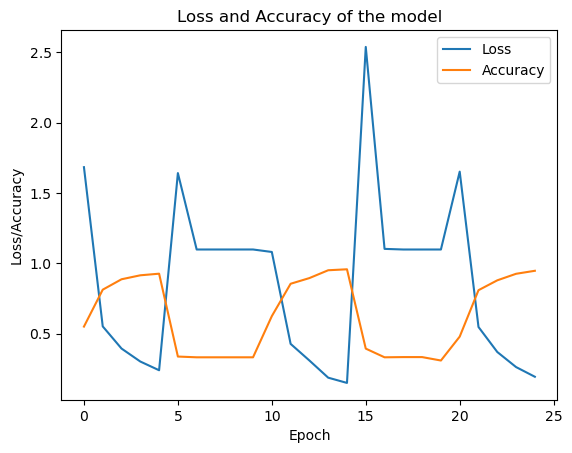

In [32]:
# Plot the loss and the accuracy
plt.figure()  # Create a new figure
plt.plot(losses)
plt.plot(accuracies)
plt.title('Loss and Accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(['Loss', 'Accuracy'])
plt.show()

## There is improvement with cross validation

18/18 [==============================] - 1s 37ms/step


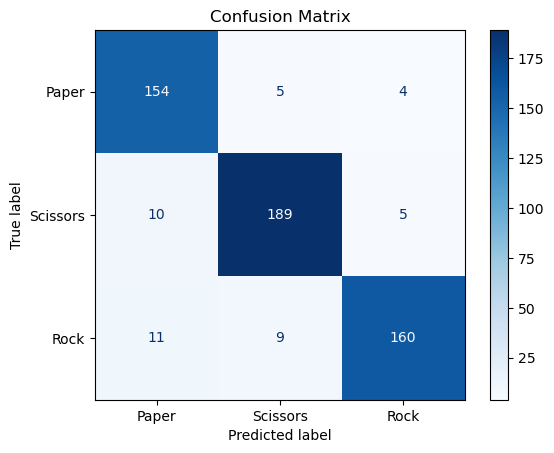

In [33]:
# Predict the labels for the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
labels = ['Paper', 'Scissors', 'Rock']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()